# SOCIAL MEDIA ANALYTICS FOR THE AIRLINES INDUSTRY: Who’s doing it right in COVID era

Thousands of social conversations about airlines are taking place every day from passengers sharing flight experiences, to the airlines themselves using social channels to promote new deals and campaigns.  
Objective of this project will give you a quick overview of the airline industry in 2020. We are going to analyze selected airlines across the globe to provide a quick social media analysis of the industry.

**We’ll be able to answer:**
1.	Where your brand stands in the industry as well how the airline industry is performing during and after pandemic crisis
2.	Compare brand share of voice, sentiment and demographics
3.	Know most influential users of selected airline hashtags in 2020 

**Data Source:**  
1.	We will use web crawling/Web scraping technique to crawl pages continuously and scrape/download the content from below website.	
https://www.airlinequality.com/review-pages/a-z-airline-reviews/ 
2.	We will use twitter Data to find out the most influential users of airline hashtags in 2020 

**Data analysis techniques:**  
1.	Topic Modeling to show two hidden topics in the data and where the particular airline stands in the market.
2.	Sentiment Analysis to compare brand share of voice, sentiment (positive or negative or neutral) of reviews, and world clouds.
3.	Hashtag Network Analysis to understand the user’s layout using NodeXL and Gephi

**Expected benefits & Potential Clients:**    
Airlines who want to get benefit from Social Data and understand public sentiment towards a particular airline is positive or negative?



# Data Science is OSEMN
It all started as Data was walking down the rows when he came across a weird, yet interesting, pipe. On one end was a pipe with an entrance and at the other end an exit. The pipe was also labeled with five distinct letters: “O.S.E.M.N.”. Curious as he was, Data decided to enter the pipeline. Long story short… in came data and out came insight.

We will use OSEMN Pipeline for this project  
O — Obtaining our data  
S — Scrubbing / Cleaning our data  
E — Exploring / Visualizing our data will allow us to find patterns and trends  
M — Modeling our data will give us our predictive power as a wizard  
N — Interpreting our data  

In [1]:
# import python packages
import requests
from lxml import html
import csv
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Vejendla\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Obtaining our data 

In [2]:
# function to scrape the data from 20 pages for given airlines
def data_scraping(web):
    airlinedata = []
    for page in range(1,20,1):
        url = web + str(page) + '/'      # concatenate string and number ... convert number to string first
        print(url)
        #print(requests.get(url).text)
        data = html.fromstring(requests.get(url).text)    
        #print(e.text_content() for e in data.xpath('/html/body/div'))
        
        # find the repeating elements from the page. We didn't get the data yet.
        for i in data.xpath("//div[1]/article/article[contains(@class,'comp_media-review-rated')]"):
            overall_rating = i.xpath("div[1]/span[1]/text()")[0]
            header = i.xpath("div[2]/h2/text()")[0]
            review = i.xpath("div[2]/div/div[1]/text() | div[2]/div/div[1]/text()[2]")
        
            trcnt = 1
            aircraft=''
            traveller_type=''
            seat_type=''
            route=''
            date_flown=''
            seat_comfort=''
            cabin_service=''
            food_beverages=''
            entertainment=''
            ground_service=''
            wifi=''
            ValueForMoney=''
            recommended=''
            for j in i.xpath("div[2]/div/div[2]/table[@class='review-ratings']"):
                #print(j.xpath('tr['+ str(trcnt) +']/td[1]/text()'), j.xpath('tr['+ str(trcnt) +']/td[2]/text()'))
                if j.xpath('tr['+ str(trcnt) +']/td[1]/text()'):
                    if j.xpath('tr['+ str(trcnt) +']/td[1]/text()')[0] == 'Aircraft':
                        aircraft = j.xpath('tr['+ str(trcnt) +']/td[2]/text()')[0]
                        trcnt += 1 
        
            for j in i.xpath("div[2]/div/div[2]/table[@class='review-ratings']"):
                if j.xpath('tr['+ str(trcnt) +']/td[1]/text()'):
                    if j.xpath('tr['+ str(trcnt) +']/td[1]/text()')[0] == 'Type Of Traveller':
                        traveller_type = j.xpath('tr['+ str(trcnt) +']/td[2]/text()')[0]
                        trcnt += 1
        
            for j in i.xpath("div[2]/div/div[2]/table[@class='review-ratings']"):
                if j.xpath('tr['+ str(trcnt) +']/td[1]/text()'):
                    if j.xpath('tr['+ str(trcnt) +']/td[1]/text()')[0] == 'Seat Type':
                        seat_type = j.xpath('tr['+ str(trcnt) +']/td[2]/text()')[0]
                        trcnt += 1
        
            for j in i.xpath("div[2]/div/div[2]/table[@class='review-ratings']"):
                if j.xpath('tr['+ str(trcnt) +']/td[1]/text()'):
                    if j.xpath('tr['+ str(trcnt) +']/td[1]/text()')[0] == 'Route':
                        route = j.xpath('tr['+ str(trcnt) +']/td[2]/text()')[0]
                        trcnt += 1
        
            for j in i.xpath("div[2]/div/div[2]/table[@class='review-ratings']"):
                if j.xpath('tr['+ str(trcnt) +']/td[1]/text()'):
                    if j.xpath('tr['+ str(trcnt) +']/td[1]/text()')[0] == 'Date Flown':
                        date_flown = j.xpath('tr['+ str(trcnt) +']/td[2]/text()')[0]
                        trcnt += 1
        
            for j in i.xpath("div[2]/div/div[2]/table[@class='review-ratings']"):
                if j.xpath('tr['+ str(trcnt) +']/td[1]/text()'):
                    if j.xpath('tr['+ str(trcnt) +']/td[1]/text()')[0] == 'Seat Comfort':
                        seat_comfort = j.xpath("tr["+ str(trcnt) +"]/td[2]/span[@class='star fill']/text()")[-1]
                        trcnt += 1
        
            for j in i.xpath("div[2]/div/div[2]/table[@class='review-ratings']"):
                if j.xpath('tr['+ str(trcnt) +']/td[1]/text()'):
                    if j.xpath('tr['+ str(trcnt) +']/td[1]/text()')[0] == 'Cabin Staff Service':
                        cabin_service = j.xpath("tr["+ str(trcnt) +"]/td[2]/span[@class='star fill']/text()")[-1]
                        trcnt += 1
                
            for j in i.xpath("div[2]/div/div[2]/table[@class='review-ratings']"):
                if j.xpath('tr['+ str(trcnt) +']/td[1]/text()'):
                    if j.xpath('tr['+ str(trcnt) +']/td[1]/text()')[0] == 'Food & Beverages':
                        food_beverages = j.xpath("tr["+ str(trcnt) +"]/td[2]/span[@class='star fill']/text()")[-1]
                        trcnt += 1
        
            for j in i.xpath("div[2]/div/div[2]/table[@class='review-ratings']"):
                if j.xpath('tr['+ str(trcnt) +']/td[1]/text()'):
                    if j.xpath('tr['+ str(trcnt) +']/td[1]/text()')[0] == 'Inflight Entertainment':
                        entertainment = j.xpath("tr["+ str(trcnt) +"]/td[2]/span[@class='star fill']/text()")[-1]
                        trcnt += 1
        
            for j in i.xpath("div[2]/div/div[2]/table[@class='review-ratings']"): 
                if j.xpath('tr['+ str(trcnt) +']/td[1]/text()'):
                    if j.xpath('tr['+ str(trcnt) +']/td[1]/text()')[0] == 'Ground Service':
                        ground_service = j.xpath("tr["+ str(trcnt) +"]/td[2]/span[@class='star fill']/text()")[-1]
                        trcnt += 1
        
            for j in i.xpath("div[2]/div/div[2]/table[@class='review-ratings']"):
                if j.xpath('tr['+ str(trcnt) +']/td[1]/text()'):
                    if j.xpath('tr['+ str(trcnt) +']/td[1]/text()')[0] == 'Wifi & Connectivity':
                        wifi = j.xpath("tr["+ str(trcnt) +"]/td[2]/span[@class='star fill']/text()")[-1]
                        trcnt += 1
        
            for j in i.xpath("div[2]/div/div[2]/table[@class='review-ratings']"):
                if j.xpath('tr['+ str(trcnt) +']/td[1]/text()'):
                    if j.xpath('tr['+ str(trcnt) +']/td[1]/text()')[0] == 'Value For Money':
                        ValueForMoney = j.xpath("tr["+ str(trcnt) +"]/td[2]/span[@class='star fill']/text()")[-1]
                        trcnt += 1
        
            for j in i.xpath("div[2]/div/div[2]/table[@class='review-ratings']"): 
                if j.xpath('tr['+ str(trcnt) +']/td[1]/text()'):
                    if j.xpath('tr['+ str(trcnt) +']/td[1]/text()')[0] == 'Recommended':
                        recommended = j.xpath("tr["+ str(trcnt) +"]/td[2]/text()")[0]
                        trcnt += 1 
       
            airlinedata.append([overall_rating,header,review,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_service,food_beverages,entertainment,ground_service,wifi,ValueForMoney,recommended])  
    #print(airlinedata)
    return airlinedata

In [3]:
britishdata= []
web = 'https://www.airlinequality.com/airline-reviews/british-airways/page/'
britishdata = data_scraping(web)
print("Length:", len(britishdata))
britishdata[10]

https://www.airlinequality.com/airline-reviews/british-airways/page/1/
https://www.airlinequality.com/airline-reviews/british-airways/page/2/
https://www.airlinequality.com/airline-reviews/british-airways/page/3/
https://www.airlinequality.com/airline-reviews/british-airways/page/4/
https://www.airlinequality.com/airline-reviews/british-airways/page/5/
https://www.airlinequality.com/airline-reviews/british-airways/page/6/
https://www.airlinequality.com/airline-reviews/british-airways/page/7/
https://www.airlinequality.com/airline-reviews/british-airways/page/8/
https://www.airlinequality.com/airline-reviews/british-airways/page/9/
https://www.airlinequality.com/airline-reviews/british-airways/page/10/
https://www.airlinequality.com/airline-reviews/british-airways/page/11/
https://www.airlinequality.com/airline-reviews/british-airways/page/12/
https://www.airlinequality.com/airline-reviews/british-airways/page/13/
https://www.airlinequality.com/airline-reviews/british-airways/page/14/
h

['1',
 '"BA has failed completely"',
 ['✅ ',
  ' |  London to Frankfurt. I made the mistake of exchanging my April flights with BA for a voucher, because of the travel disruption due to the pandemic. Big mistake. BA has failed completely and does not seem to care. I tried to book an August flight using the voucher, but frlights cannot be booked online using a voucher. You have to wait for hours on the phone to speak to someone. Customer service tried to charge me twice the original cost. Then no email confirmation for hours, after I chased it up (another long wait on hold). Email confirmation showed they had booked the wrong outbound date - service supervisor denied any error on their part and refused to rebook for correct date or give a refund. A few days later I started all over again and booked an alternative outbound date (still not the one I wanted, but better) - And 3 weeks later, BA cancelled the return flight! So I Called for a refund to be told "If it hasn\'t appeared in my ac

In [4]:
# scrape the data from 20 pages for British Airways
qatardata= []
web = 'https://www.airlinequality.com/airline-reviews/qatar-airways/page/'
qatardata = data_scraping(web)
print("Length:", len(qatardata))
qatardata[10]

https://www.airlinequality.com/airline-reviews/qatar-airways/page/1/
https://www.airlinequality.com/airline-reviews/qatar-airways/page/2/
https://www.airlinequality.com/airline-reviews/qatar-airways/page/3/
https://www.airlinequality.com/airline-reviews/qatar-airways/page/4/
https://www.airlinequality.com/airline-reviews/qatar-airways/page/5/
https://www.airlinequality.com/airline-reviews/qatar-airways/page/6/
https://www.airlinequality.com/airline-reviews/qatar-airways/page/7/
https://www.airlinequality.com/airline-reviews/qatar-airways/page/8/
https://www.airlinequality.com/airline-reviews/qatar-airways/page/9/
https://www.airlinequality.com/airline-reviews/qatar-airways/page/10/
https://www.airlinequality.com/airline-reviews/qatar-airways/page/11/
https://www.airlinequality.com/airline-reviews/qatar-airways/page/12/
https://www.airlinequality.com/airline-reviews/qatar-airways/page/13/
https://www.airlinequality.com/airline-reviews/qatar-airways/page/14/
https://www.airlinequality.co

['9',
 '"whole experience was truly amazing"',
 ['✅ ',
  ' |  Level of customer service is superb. I had forgotten my carry on luggage in the aircraft and the ground staff at Jomo Kenyatta airport in Nairobi retrieved it for me from the airport with less than 20 minutes to go before the boarding commenced. The flight purser on the Doha-Nairobi route was extremely helpful and helped me carry of the luggage to the bottom of the stairs - I am a regular flyer (7+ international trips a year) but this is first time I am experiencing customer service this superior. My Gluten free meal was 5 star; on the outward trip, I forgot to put in request for gluten free meal and so when I requested for it once aboard the aircraft, the attendant really went out of their way to meet my request. With this level of service, I am converted and Qatar will be my first choice - the whole experience was truly amazing.'],
 '',
 'Business',
 'Economy Class',
 'Nairobi to Istanbul via Doha',
 'October 2020',
 '5',


# Scrubbing / Cleaning our data

In [5]:
# changing the data more like Excel format
britishdf = pd.DataFrame(britishdata)
britishdf.to_csv("data/british_reviews.csv", encoding='utf-8')

#Delete non 'Type Of Traveller' values - not usuful for our analysis
#mask = britishdf[3].apply(lambda x: 'Type Of Traveller' in x)
#britishdf = britishdf[mask]

# convert list to data frame 
britishdf = britishdf.rename(columns = {0:'OverallRating', 1:'Header', 2:'Review', 3: 'Aircraft', 4:'TravellerType', 5:'SeatType', 6:'Route', 7:'DateFlown', 8:'SeatComfort', 9:'CabinService', 10:'FoodBeverages', 11:'Entertainment', 12:'GroundService', 13:'wifi', 14:'ValueForMoney', 15:'Recommended'}, inplace = False)
britishdf[:3]

,OverallRating,Header,Review,Aircraft,TravellerType,SeatType,Route,DateFlown,SeatComfort,CabinService,FoodBeverages,Entertainment,GroundService,wifi,ValueForMoney,Recommended
0,9,"""my experience with BA was very positive""",[ | Overall I have to say I am really pleased...,,Solo Leisure,Economy Class,London to Venice,October 2020,5,4,3,,3,,5,yes
1,10,"""refunded my tickets within 2 working days""","[✅ , | I am extremely pleased with British Ai...",,Couple Leisure,Economy Class,Munich to London,November 2019,5,5,5,5,5,5,5,yes
2,5,"""Everything was nice except food""","[✅ , | Boarding and checkin formalities are ...",,Family Leisure,Economy Class,London to Bangalore,October 2020,5,5,1,5,5,3,2,no


In [6]:
#remove brackets from review
for ind in britishdf.index: 
     britishdf['Review'][ind] = ' '.join(britishdf['Review'][ind])
        
# remove unwanted words and characters for data analysis later
britishdf['Review'] = britishdf['Review'].str.replace('\d+', ' ')
britishdf['Review'] = britishdf['Review'].str.replace('[^a-zA-Z]+', ' ')
britishdf['Review'] = britishdf['Review'].str.findall('\w{3,}').str.join(' ')

# remove unwanted words and characters for data analysis later
britishdf['Header'] = britishdf['Header'].str.replace('\d+', ' ')
britishdf['Header'] = britishdf['Header'].str.replace('[^a-zA-Z]+', ' ')
britishdf['Header'] = britishdf['Header'].str.findall('\w{3,}').str.join(' ')

#fill empty with 0 ratings 
britishdf = britishdf.stack().apply(pd.to_numeric, errors='ignore').fillna(0).unstack()

#convert object type columns to integer  
britishdf["Recommended"] = britishdf["Recommended"].replace(['yes','no'],[1,0]).astype(str).astype(int)
britishdf["OverallRating"] = britishdf["OverallRating"].astype(str).astype(int)
britishdf["SeatComfort"] = britishdf["SeatComfort"].astype(str).astype(int)
britishdf["CabinService"] = britishdf["CabinService"].astype(str).astype(int)
britishdf["FoodBeverages"] = britishdf["FoodBeverages"].astype(str).astype(int)
britishdf["Entertainment"] = britishdf["Entertainment"].astype(str).astype(int)
britishdf["GroundService"] = britishdf["GroundService"].astype(str).astype(int)
britishdf["wifi"] = britishdf["wifi"].astype(str).astype(int)
britishdf["ValueForMoney"] = britishdf["ValueForMoney"].astype(str).astype(int)

britishdf.head(5)

,OverallRating,Header,Review,Aircraft,TravellerType,SeatType,Route,DateFlown,SeatComfort,CabinService,FoodBeverages,Entertainment,GroundService,wifi,ValueForMoney,Recommended
0,9,experience with was very positive,Overall have say really pleased with the servi...,0,Solo Leisure,Economy Class,London to Venice,October 2020,5,4,3,0,3,0,5,1
1,10,refunded tickets within working days,extremely pleased with British Airways they re...,0,Couple Leisure,Economy Class,Munich to London,November 2019,5,5,5,5,5,5,5,1
2,5,Everything was nice except food,Boarding and checkin formalities are very nice...,0,Family Leisure,Economy Class,London to Bangalore,October 2020,5,5,1,5,5,3,2,0
3,10,Everything expected,have always had great flights with British Air...,A320neo,Solo Leisure,Business Class,Warsaw to London-Heathrow,September 2020,5,5,5,5,4,5,5,1
4,1,told that the check had closed,had flight Santorini from LHR the flight was f...,A321,Couple Leisure,Economy Class,London to Santorini,August 2020,4,4,3,0,1,0,2,0


In [7]:
# changing the data more like Excel format
qatardf = pd.DataFrame(qatardata)
qatardf.to_csv("data/british_reviews.csv", encoding='utf-8')

# convert list to data frame (excel-like)
qatardf = qatardf.rename(columns = {0:'OverallRating', 1:'Header', 2:'Review', 3: 'Aircraft', 4:'TravellerType', 5:'SeatType', 6:'Route', 7:'DateFlown', 8:'SeatComfort', 9:'CabinService', 10:'FoodBeverages', 11:'Entertainment', 12:'GroundService',13:'wifi', 14:'ValueForMoney', 15:'Recommended'}, inplace = False)
qatardf.head(2)
qatardf[:2]

,OverallRating,Header,Review,Aircraft,TravellerType,SeatType,Route,DateFlown,SeatComfort,CabinService,FoodBeverages,Entertainment,GroundService,wifi,ValueForMoney,Recommended
0,4,"""The service was exemplary""","[✅ , | We flew Sydney-Doha-London business c...",Boeing 777,Couple Leisure,Business Class,Sydney to London via Doha,October 2020,4,5,5,3,2,,5,no
1,10,"""they are in my opinion the best""","[✅ , | I have the pleasure to live in Thaila...",A350-900 / Boing 777-300,Couple Leisure,Premium Economy,Copenhagen to Bangkok via Doha,November 2020,4,5,5,5,5,5,5,yes


In [8]:
#remove brackets from review
for ind in qatardf.index: 
     qatardf['Review'][ind] = ' '.join(qatardf['Review'][ind])        

# remove unwanted words and characters for data analysis later
qatardf['Review'] = qatardf['Review'].str.replace('\d+', ' ')
qatardf['Review'] = qatardf['Review'].str.replace('[^a-zA-Z]+', ' ')
qatardf['Review'] = qatardf['Review'].str.findall('\w{3,}').str.join(' ')

# remove unwanted words and characters for data analysis later
qatardf['Header'] = qatardf['Header'].str.replace('\d+', ' ')
qatardf['Header'] = qatardf['Header'].str.replace('[^a-zA-Z]+', ' ')
qatardf['Header'] = qatardf['Header'].str.findall('\w{3,}').str.join(' ')

#fill empty with 0 ratings 
qatardf = qatardf.stack().apply(pd.to_numeric, errors='ignore').fillna(0).unstack()

#convert object type columns to integer  
qatardf["Recommended"] = qatardf["Recommended"].replace(['yes','no'],[1,0]).astype(str).astype(int)
qatardf["OverallRating"] = qatardf["OverallRating"].astype(str).astype(int)
qatardf["SeatComfort"] = qatardf["SeatComfort"].astype(str).astype(int)
qatardf["CabinService"] = qatardf["CabinService"].astype(str).astype(int)
qatardf["FoodBeverages"] = qatardf["FoodBeverages"].astype(str).astype(int)
qatardf["Entertainment"] = qatardf["Entertainment"].astype(str).astype(int)
qatardf["GroundService"] = qatardf["GroundService"].astype(str).astype(int)
qatardf["wifi"] = qatardf["wifi"].astype(str).astype(int)
qatardf["ValueForMoney"] = qatardf["ValueForMoney"].astype(str).astype(int)

qatardf.head(5)

,OverallRating,Header,Review,Aircraft,TravellerType,SeatType,Route,DateFlown,SeatComfort,CabinService,FoodBeverages,Entertainment,GroundService,wifi,ValueForMoney,Recommended
0,4,The service was exemplary,flew Sydney Doha London business class not flo...,Boeing 777,Couple Leisure,Business Class,Sydney to London via Doha,October 2020,4,5,5,3,2,0,5,0
1,10,they are opinion the best,have the pleasure live Thailand for months eve...,A350-900 / Boing 777-300,Couple Leisure,Premium Economy,Copenhagen to Bangkok via Doha,November 2020,4,5,5,5,5,5,5,1
2,7,changed flying for all,Flew from Doha Islamabad just the pandemic beg...,Boeing 777-300ER,Family Leisure,Economy Class,Doha to Islamabad,March 2020,5,5,5,5,3,5,5,1
3,9,staff were extremely friendly attentive and ca...,had travel short notice the ticket price was v...,A350,Solo Leisure,Economy Class,Zurich to Tokyo Narita via Doha,November 2020,4,5,5,5,5,5,4,1
4,2,ticket doesn include lounge access,After nice business class trip from Frankfurt ...,0,Couple Leisure,Business Class,Male to Frankfurt via Doha,November 2020,3,4,3,3,1,3,1,0


# Exploring / Visualizing our data will allow us to find patterns and trends

At this point we have much cleaner data that is easy to analyze. The OverallRating column starts from 1 to 10 on the scale of 10.  Seat Comfort, Cabin Service, Food and Beverages, Good Service,  Value for Money, were converted from 0-5 star ratings into a 0-5 scale making it usable. And the reviews were cleaned to remove unwanted common words.

## Descriptive Analytics

### British Airlines

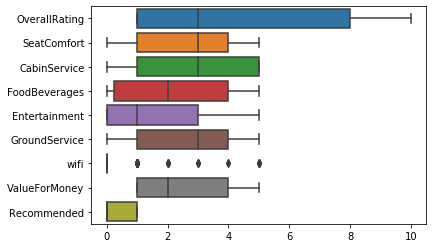

In [9]:
#Create a boxplot
sns.boxplot(data= britishdf, orient="h")

In [10]:
# Display the average ratings for each category for British Airlines
print("British Airline rating averages:")
pd.DataFrame(britishdf[["OverallRating","SeatComfort","CabinService","FoodBeverages","Entertainment","GroundService","wifi","ValueForMoney"]].mean())

British Airline rating averages:


,0
OverallRating,4.573684
SeatComfort,2.594737
CabinService,2.978947
FoodBeverages,2.273684
Entertainment,1.600000
GroundService,2.668421
wifi,0.494737
ValueForMoney,2.652632


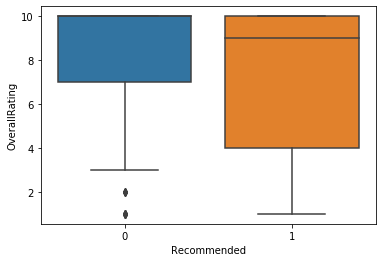

In [11]:
#plot Overall Ratings vs Recommended chart for British Airways
sns.boxplot(britishdf.Recommended, qatardf.OverallRating);

The above data shows that customers who gave high Overall Rating (above 8) gave mixed ("Yes" or "No") recommendation. 
This is evidence that there is a lot of variability when dealing with customer satisfaction.

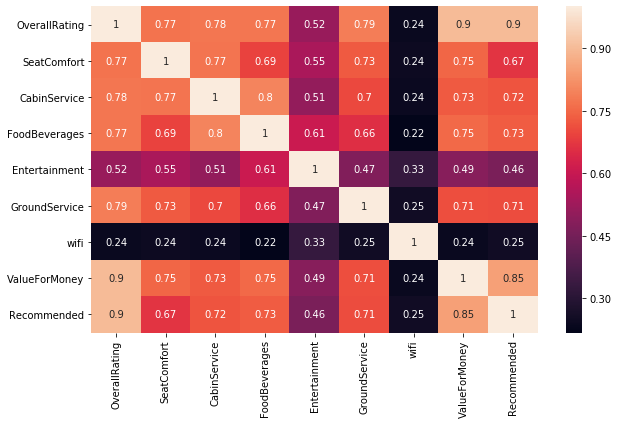

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# British Airlines Heatmap to show the correlation between each category.
plt.figure(figsize=(10,6))
sns.heatmap(britishdf.corr(), annot=True)

British airlines Recommendation has lowest correlations with 'wifi' and 'Entertainment', and highly correlated with 'Food and Beverages', 'Cabin Service', 'Seat Comfort' along with 'Value for Money' and 'Overall Rating'

### Qatar Airlines

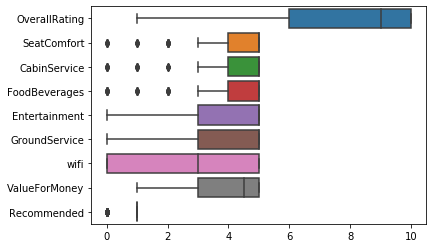

In [13]:
#Create a boxplot
sns.boxplot(data=qatardf, orient="h")

In [14]:
# Display the average ratings for each category for British Airlines
print ("Quatar Airline rating averages:")
qatardf[["OverallRating","SeatComfort","CabinService","FoodBeverages","Entertainment","GroundService","wifi","ValueForMoney"]].mean()

Quatar Airline rating averages:


OverallRating    7.578947
SeatComfort      4.005263
CabinService     4.263158
FoodBeverages    3.994737
Entertainment    3.826316
GroundService    3.826316
wifi             2.515789
ValueForMoney    3.947368
dtype: float64

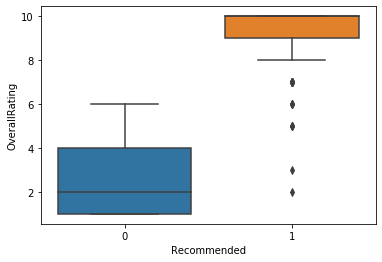

In [15]:
#plot Overall Ratings vs Recommended chart for Qatar Airways
sns.boxplot(qatardf.Recommended, qatardf.OverallRating);

The above data shows that customers who gave high Overall Rating (above 8) gave "Yes" recommendation.

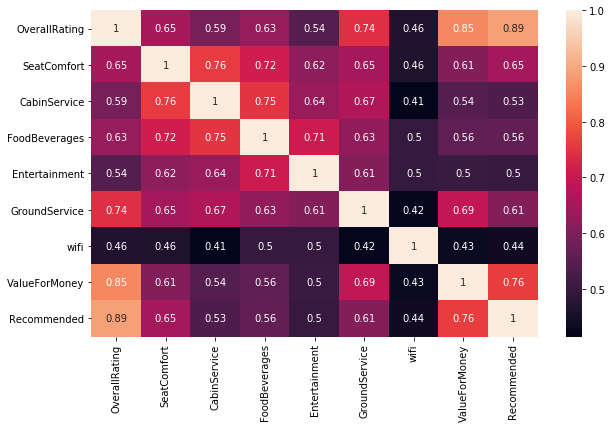

In [16]:
# Qatar Airlines Heatmap to show the correlation between each category.
plt.figure(figsize=(10,6))
sns.heatmap(qatardf.corr(), annot=True)

Qatar airlines Recommendation has lowest correlations with 'wifi' and 'Entertainment', and highly correlated with  'Seat Comfort', 'Ground Serive', 'Food and Beverages' along with 'Value for Money' and 'Overall Rating'.

#### Below are the overall percentages of the number of people who recommend the airlines. It is sometimes more reliable to look at a percentage due to the fact that there were roughly twice as many American Airline reviews than Qatar reviews.

percentage of people who recommended British airline: 39.5 %


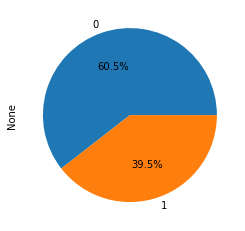

In [90]:
# print the overall percentage of people who recommend the British airline
percentage = float(britishdf['Recommended'].sum()/len(britishdf))
print("percentage of people who recommended British airline: %.1f" %(percentage*100),'%')
# pie chart for recommendation precentage
britishdf.groupby('Recommended').size().plot(kind='pie',autopct='%.1f%%');

percentage of people who recommended Qatar airline: 76.8 %


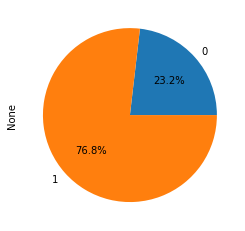

In [89]:
# print the overall percentage of people who recommend the Qatar airline
percentage = float(qatardf['Recommended'].sum()/len(britishdf))
print("percentage of people who recommended Qatar airline: %.1f" %(percentage*100),'%')
# pie chart for recommendation precentage
qatardf.groupby('Recommended').size().plot(kind='pie',autopct='%.1f%%');

The above shows that British airlines has a significantly lower percentage of "Yes" recommendations, and Qatar has highest percentage of Yes Recommendations.

#### Next we will generate groupby tables which will display the average ratings for each airline, along with the number of people who would recommend the airline broken up by cabin.

In [19]:
# British groupby shows the average rating for each section broken up by cabin and whether it is recommended or not
count = britishdf.groupby('SeatType')['Recommended'].value_counts().reset_index(name='Count').reset_index()

british_summary = britishdf.groupby(['SeatType', 'Recommended'])[["OverallRating","SeatComfort","CabinService","FoodBeverages","Entertainment","GroundService","wifi","ValueForMoney"]].mean().reset_index()
british_summary = pd.merge(british_summary, count, on=['SeatType', 'Recommended'])
british_summary =  british_summary[['SeatType', 'Recommended', 'Count', "OverallRating","SeatComfort","CabinService","FoodBeverages","Entertainment","GroundService","wifi","ValueForMoney"]]
british_summary

,SeatType,Recommended,Count,OverallRating,SeatComfort,CabinService,FoodBeverages,Entertainment,GroundService,wifi,ValueForMoney
0,Business Class,0,27,2.518519,2.074074,2.259259,1.777778,1.370370,1.925926,0.296296,1.629630
1,Business Class,1,31,8.419355,3.967742,4.516129,4.290323,2.290323,4.225806,1.000000,4.322581
2,Economy Class,0,73,1.904110,1.534247,1.849315,1.027397,0.726027,1.534247,0.273973,1.589041
3,Economy Class,1,38,8.368421,3.947368,4.657895,3.631579,2.736842,4.184211,0.736842,4.263158
4,First Class,0,2,3.500000,1.500000,2.500000,0.500000,1.500000,1.000000,0.000000,2.000000
5,First Class,1,2,9.000000,4.000000,5.000000,5.000000,4.500000,4.500000,0.500000,4.500000
6,Premium Economy,0,13,1.692308,1.692308,1.461538,0.846154,0.923077,1.923077,0.153846,1.307692
7,Premium Economy,1,4,9.000000,4.750000,4.750000,4.000000,3.750000,4.250000,1.000000,4.500000


In [20]:
# Qatar groupby shows the average rating for each section broken up by cabin and whether it is recommended or not
count = qatardf.groupby('SeatType')['Recommended'].value_counts().reset_index(name='Count').reset_index()

qatar_summary = qatardf.groupby(['SeatType', 'Recommended'])[["OverallRating","SeatComfort","CabinService","FoodBeverages","Entertainment","GroundService","wifi","ValueForMoney"]].mean().reset_index()
qatar_summary = pd.merge(qatar_summary, count, on=['SeatType', 'Recommended'])
qatar_summary = qatar_summary[['SeatType', 'Recommended', 'Count', "OverallRating","SeatComfort","CabinService","FoodBeverages","Entertainment","GroundService","wifi","ValueForMoney"]]
qatar_summary

,SeatType,Recommended,Count,OverallRating,SeatComfort,CabinService,FoodBeverages,Entertainment,GroundService,wifi,ValueForMoney
0,Business Class,0,14,3.142857,2.785714,4.428571,3.214286,2.928571,3.142857,0.642857,2.500000
1,Business Class,1,40,8.975000,4.750000,4.875000,4.650000,4.350000,4.375000,3.050000,4.275000
2,Economy Class,0,30,2.100000,2.166667,2.200000,2.100000,2.000000,1.633333,0.833333,1.866667
3,Economy Class,1,105,9.180952,4.409524,4.590476,4.380952,4.257143,4.323810,3.019048,4.600000
4,Premium Economy,1,1,10.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


##### Now lets look at Seat Type (Cabin) compare that to whether the customer have a "Yes" or "No" recommendation.

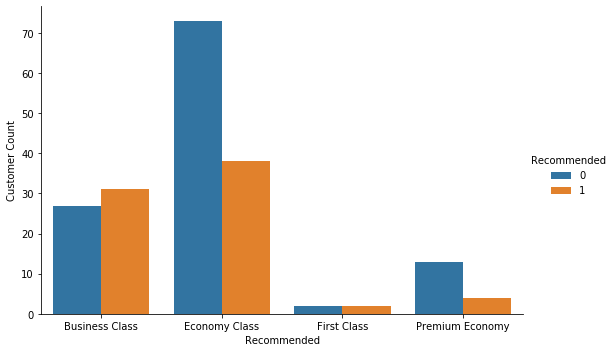

In [21]:
# Recommendation comparison by Cabin  
ax = sns.catplot(x="SeatType", y="Count", data=british_summary, kind="bar", hue="Recommended",aspect=1.5)
ax.set_axis_labels("Recommended", "Customer Count");

British Airways Economy Class has got highest 'No' recommended than 'Yes'

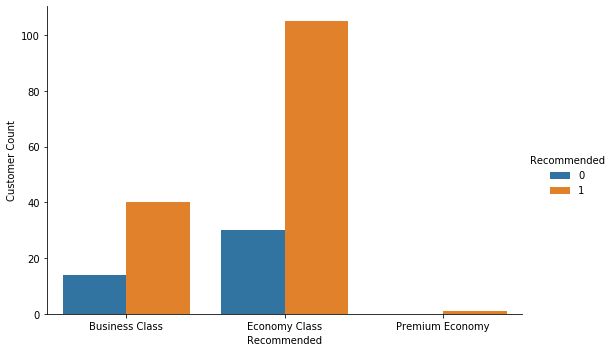

In [22]:
# Recommendation comparison by Cabin 
ax = sns.catplot(x="SeatType", y="Count", data=qatar_summary, kind="bar", hue="Recommended",aspect=1.5)
ax.set_axis_labels("Recommended", "Customer Count");

Qatar Economy and Business Class has got highest 'Yes' recommended than 'No'

##### Which category Rating appear to be highly influential in Customer Recommendation?  
we'll look at a few plots to enable visual comparison of yes and no recommendations with each category rating.

#### British Airways

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


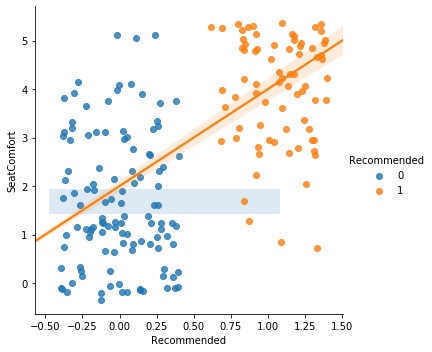

In [23]:
# Visualize the relationship between SeatComfort and Recommendation
sns.lmplot("Recommended", "SeatComfort", hue="Recommended", data=britishdf, y_jitter=0.40, x_jitter=.40);

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


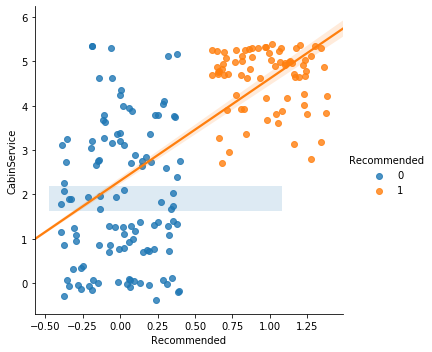

In [24]:
# Visualize the relationship between CabinService and Recommendation
sns.lmplot("Recommended", "CabinService", hue="Recommended", data=britishdf, y_jitter=0.40, x_jitter=.40);

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


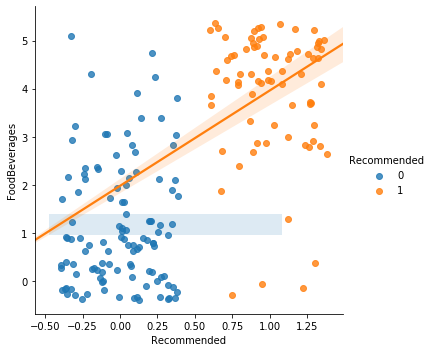

In [25]:
# Visualize the relationship between FoodBeverages and Recommendation
sns.lmplot("Recommended", "FoodBeverages", hue="Recommended", data=britishdf, y_jitter=0.40, x_jitter=.40);

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


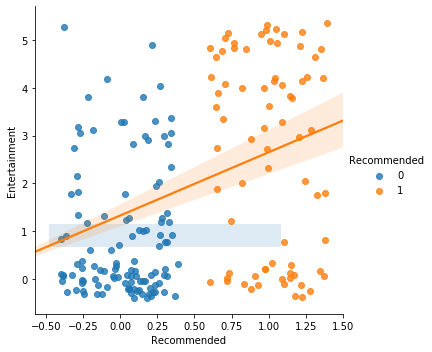

In [26]:
# Visualize the relationship between Entertainment and Recommendation
sns.lmplot("Recommended", "Entertainment", hue="Recommended", data=britishdf, y_jitter=0.40, x_jitter=.40);

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


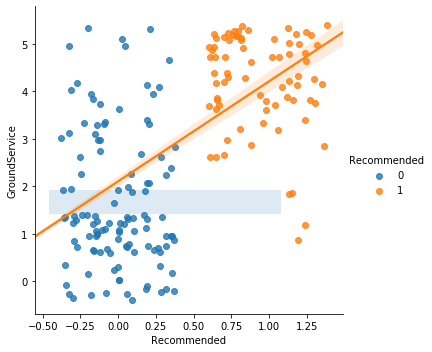

In [27]:
# Visualize the relationship between GroundService and Recommendation
sns.lmplot("Recommended", "GroundService", hue="Recommended", data=britishdf, y_jitter=0.40, x_jitter=.40);

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


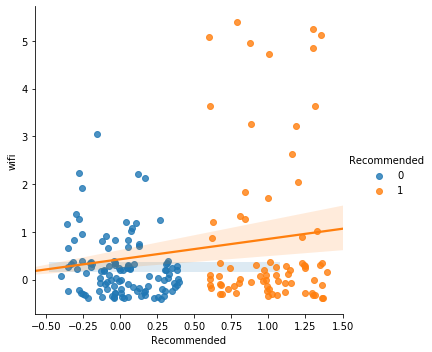

In [28]:
# Visualize the relationship between wifi and Recommendation
sns.lmplot("Recommended", "wifi", hue="Recommended", data=britishdf, y_jitter=0.40, x_jitter=.40);

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


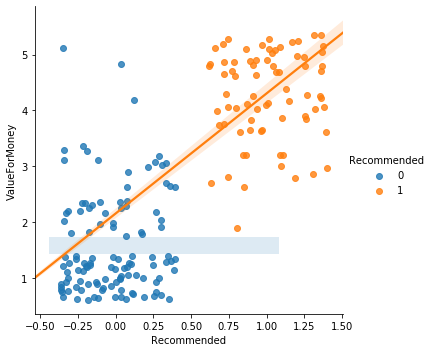

In [29]:
# Visualize the relationship between ValueForMoney and Recommendation
sns.lmplot("Recommended", "ValueForMoney", hue="Recommended", data=britishdf, y_jitter=0.40, x_jitter=.40);

The charts above show that for the "Yes" recommendations for Qatar airlines were judged pretty heavily on 'Food and Beverages', 'Cabin Service', 'Seat Comfort' along with 'Value for Money' and 'Overall Rating'

### Qatar

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


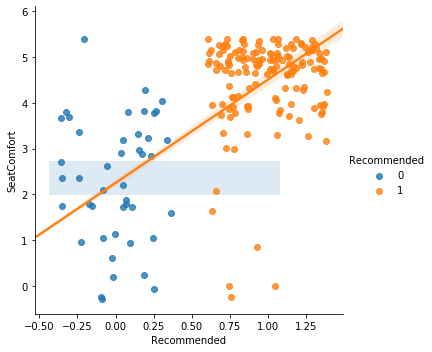

In [30]:
# Visualize the relationship between SeatComfort and Recommendation
sns.lmplot("Recommended", "SeatComfort", hue="Recommended", data=qatardf, y_jitter=0.40, x_jitter=.40);

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


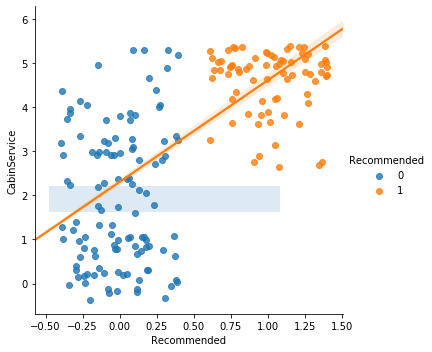

In [31]:
# Visualize the relationship between CabinService and Recommendation
sns.lmplot("Recommended", "CabinService", hue="Recommended", data=britishdf, y_jitter=0.40, x_jitter=.40);

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


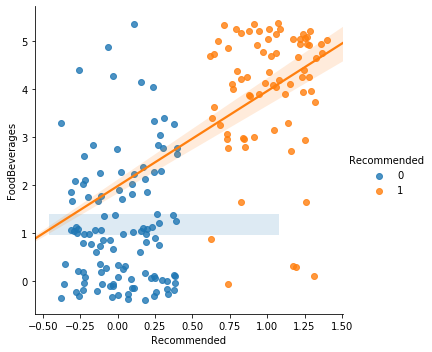

In [32]:
# Visualize the relationship between FoodBeverages and Recommendation
sns.lmplot("Recommended", "FoodBeverages", hue="Recommended", data=britishdf, y_jitter=0.40, x_jitter=.40);

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


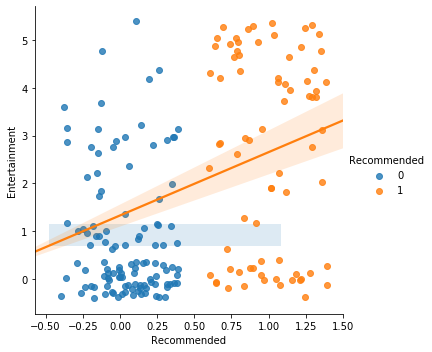

In [33]:
# Visualize the relationship between Entertainment and Recommendation
sns.lmplot("Recommended", "Entertainment", hue="Recommended", data=britishdf, y_jitter=0.40, x_jitter=.40);

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


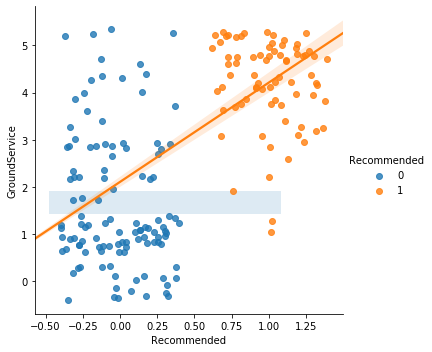

In [34]:
# Visualize the relationship between GroundService and Recommendation
sns.lmplot("Recommended", "GroundService", hue="Recommended", data=britishdf, y_jitter=0.40, x_jitter=.40);

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


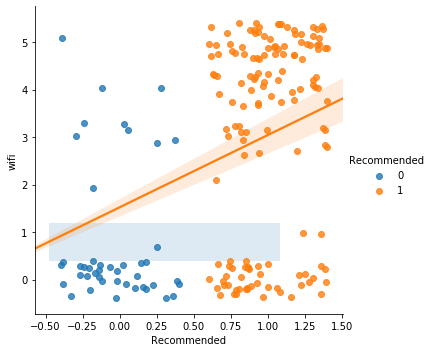

In [35]:
# Visualize the relationship between wifi and Recommendation
sns.lmplot("Recommended", "wifi", hue="Recommended", data=qatardf, y_jitter=0.40, x_jitter=.40);

C:\Users\Vejendla\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


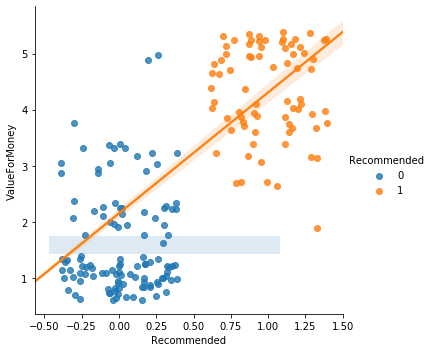

In [36]:
# Visualize the relationship between ValueForMoney and Recommendation
sns.lmplot("Recommended", "ValueForMoney", hue="Recommended", data=britishdf, y_jitter=0.40, x_jitter=.40);

The charts above show that for the "Yes" recommendations for Qatar airlines were judged pretty heavily on 'Seat Comfort' along with 'Value for Money' and 'Overall Rating'.

# Modeling our data will give us our predictive power as a wizard
Unsupervised Content Analytics  
 ▪ Sentiment analysis
 ▪ Topic modeling

## Sentiment analysis

In [37]:
######Data Wrangling definition #######################
#Tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
#Stemming
from nltk.stem import PorterStemmer    
#Lemmatizing
from nltk.stem import WordNetLemmatizer
#import STOP words
from nltk.corpus import stopwords
    
def data_wrangling(text):
    
    ####################### Text Preprocessing#######################
    #lowecases
    text = str(text).lower()
    
    # Remove useless numbers and alphanumerical words
    text = re.sub("[^a-zA-Z0-9]", " ", text)
    
    #tokenization or word split
    tokens = word_tokenize(text)

    #Remove stopwords
    # A list of extra stopwords specific to the reviews (if you want to remove more stopwords)
    more_stopwords = set(('flight','will', 'people', 'need', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way',
                   'president', 'want', 'like','say','got','said','just','something','tell','put','now', 'bad','back','want',
                   'right','every','one','use','come','never', 'many','along','things','day','also','first','guy', 'great', 
                   'take', 'good', 'much','anderson', 'let', 'would', 'year', 'thing', 'america', 'talk', 'talking', 'thank',
                   'does', 'give', 'look', 'believe', 'tonight','today','see','that', 'this', 'em', 'wa', 'http', 'com', 'que',
                   'one', 'want', 'would', 'also', 'unless','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
                   'book','ply','flying','what','yep','yer','aest','didn','nzdt','via','typed', 'impact','alongside','list',
                   'range', 'one','com','new','like','great','make','top', 'question', 'answer', 'tonight', 'american',
                   'tomorrow', 'good','wow','yes','say','yay','would','thanks','thank','going', 'learned', 'another','apart',
                   'iyi', 'yle', 'new','use','should','could','really','see','want','nice', 'able', 'airline', 'made', 
                   'called','two', 'while','know','free','today','day','always','last','put','live', 'trip', 'due', 'ask',
                   'asked', 'help', 'week','went','wasn','was','used','ugh','try','kind', 'http','much', 'airline', 'fly',
                   'need', 'next','app','ibm','appleevent','using','talk','film', 'totally','seen', 'told','yet','stll', 
                   'non', 'hour', 'time', 'take', 'movie', 'even', 'give','reminded', 'year', 'pre', 'saw', 'created',
                   'create', 'come', 'real', 'etc', 'cinema', 'everything', 'fit', 'buy', 'tell', 'including', 'finally',
                   'guess', 'also', 'lot', 'plenty', 'someone','onto', 'every', 'everywhere', 'thought', 'watched', 'look',
                   'caught', 'love', 'loved', 'gave', 'per', 'actor', 'anyone', 'else', 'think', 'airlines','review','focus',
                   'act', 'dose','ever','thing','never', 'show','maintains','watch','added','justiced', 'action','doha','london', 
                   'airway', 'qatar', 'perth', 'melbourne', 'london'))
    stoplist = set(stopwords.words('english')) | more_stopwords
    tokens = (word for word in tokens if word not in stoplist)

    # Filter non-alphanumeric characters from tokens
    tokens = (word for word in tokens if word.isalpha())

    #remove short words
    tokens = (word for word in tokens if len(word) >= 3)
    
    #lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = (lmtzr.lemmatize(word) for word in tokens)
    
    return tokens

### Analyze British Airways Reviews

In [38]:
for sentence in britishdf['Review'][2:4]:
     print(sentence)

Boarding and checkin formalities are very nice Check help desk was very helpful and supportive Everything was nice except food vegan and there was food availability for vegetarian passengers not pre ordered flight was hour journey from London Bangalore and was hungry
have always had great flights with British Airways but this time the experience was absolutely amazing this was flight decided celebrate Club Europe which turned out perfect decision The stewards working Club made feel special and delivered professional and personalised service and were kind and chatty Although the cabin crew was the best part the flight other features didn let down either Efficient business class check Warsaw cosy executive lounge Preludium with attentive and helpful staff well organised boarding although priority for Club Europe because Corona The aircraft was very fresh and clean Seats were comfortable with enough legroom adjustable headrests and power ports The board service different than before Coron

In [39]:
# sentiment analysis using vaderSentiment with out removing the stop words (if not found: pip install vaderSentiment at command prompt)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()  

b_positive_review = []
b_negative_review = []
b_neutral_review = []

for sentence in britishdf['Review']:
    vs = analyzer.polarity_scores(sentence)
    if vs["compound"] >= 0.5:
        b_positive_review.append(sentence)
    elif vs["compound"] <= -0.5:
        b_negative_review.append(sentence)        
    else:
        b_neutral_review.append(sentence)
        
#How many movie reviews are bad / good according to vaderSentiment
print("Number of Positive Reviews:", len(b_positive_review))
print("Number of Negative Reviews:",len(b_negative_review))
print("Number of Neutral Reviews:",len(b_neutral_review))

Number of Positive Reviews: 96
Number of Negative Reviews: 58
Number of Neutral Reviews: 36


#### Positive Reviews

In [40]:
#CleanedReview = list(data_wrangling(' '.join(britishdf['Review'].tolist())))

# What are the popular words in positive reviews after data cleanup ?
CleanedReview = list(data_wrangling(b_positive_review))
# most common words in title
from collections import Counter
reviewwords =list(CleanedReview)

print("Count of words in Title:" , len(reviewwords))
reviewwordcount = Counter(reviewwords)
reviewwordcount.most_common(15)

Count of words in Title: 5168


[('seat', 88),
 ('service', 81),
 ('crew', 54),
 ('food', 53),
 ('cabin', 47),
 ('business', 46),
 ('class', 46),
 ('british', 41),
 ('airway', 41),
 ('boarding', 38),
 ('staff', 34),
 ('heathrow', 34),
 ('check', 31),
 ('lounge', 30),
 ('passenger', 29)]

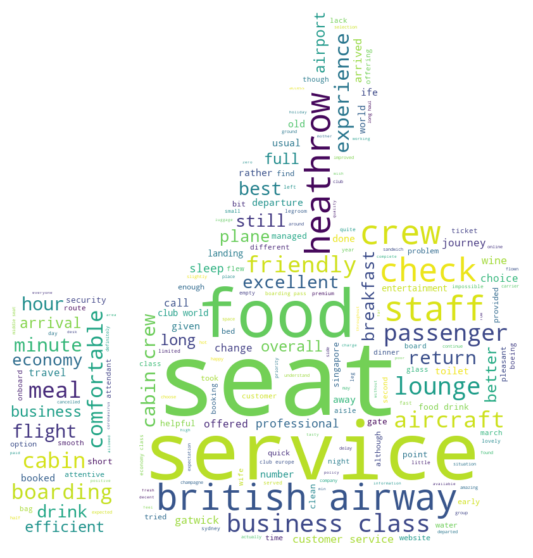

In [41]:
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
data_folder = Path("data")
mask_to_read = data_folder / "thumbup.jpg"
# read the mask image
mask = np.array(Image.open(mask_to_read))

plt.figure(figsize=(16,10))
wordcloud = WordCloud(max_words=200, mask=mask, margin=10,background_color="white",
               random_state=1).generate(' '.join(CleanedReview))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[(('british', 'airway'), 38), (('business', 'class'), 31), (('cabin', 'crew'), 21), (('customer', 'service'), 13), (('club', 'world'), 11), (('food', 'drink'), 10), (('boarding', 'pass'), 8), (('club', 'europe'), 7), (('seat', 'comfortable'), 7), (('economy', 'class'), 7), (('long', 'haul'), 6), (('middle', 'seat'), 6), (('boarding', 'pas'), 5), (('window', 'seat'), 5), (('ahead', 'schedule'), 5), (('cape', 'town'), 5), (('friendly', 'helpful'), 4), (('friendly', 'professional'), 4), (('ife', 'screen'), 4), (('boarding', 'quick'), 4), (('crew', 'friendly'), 4), (('service', 'friendly'), 4), (('crew', 'excellent'), 4), (('aisle', 'seat'), 4), (('excellent', 'service'), 4), (('class', 'ticket'), 4), (('change', 'return'), 3), (('overall', 'experience'), 3), (('bottle', 'water'), 3), (('food', 'wine'), 3), (('manage', 'booking'), 3), (('car', 'hire'), 3), (('hong', 'kong'), 3), (('staff', 'friendly'), 3), (('bag', 'drop'), 3), (('mexico', 'city'), 3), (('priority', 'boarding'), 3), (('gla

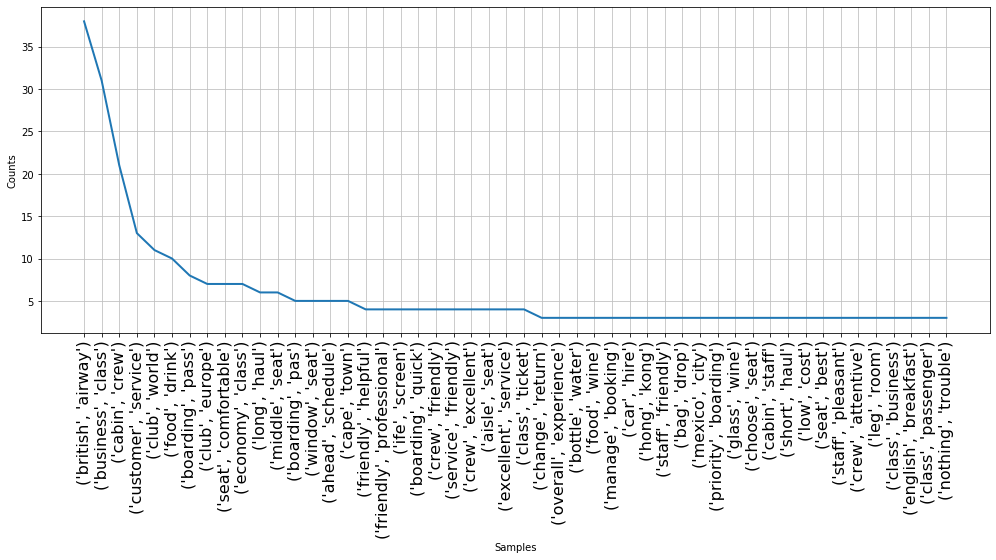

In [42]:
# What are 50 popular bigrams in positive reviews?
import nltk
from nltk import word_tokenize, FreqDist, bigrams

#Tokenize
tokens = word_tokenize(' '.join(CleanedReview))

#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)

#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
print(fdist_bi.most_common(50))

#Plot distribution
plt.figure(figsize=(17,6))
plt.xticks(rotation='vertical',fontsize=16)
fdist_bi.plot(50)

#### Negative Reviews

In [43]:
# What are the popular words in positive reviews after data cleanup ?
CleanedReview = list(data_wrangling(b_negative_review))
# most common words in title
from collections import Counter
reviewwords =list(CleanedReview)

print("Count of words in Title:" , len(reviewwords))
reviewwordcount = Counter(reviewwords)
reviewwordcount.most_common(15)

Count of words in Title: 3021


[('seat', 50),
 ('service', 29),
 ('voucher', 25),
 ('british', 24),
 ('airway', 24),
 ('refund', 22),
 ('food', 22),
 ('business', 21),
 ('cabin', 20),
 ('staff', 19),
 ('class', 19),
 ('crew', 19),
 ('delayed', 18),
 ('travel', 18),
 ('hour', 18)]

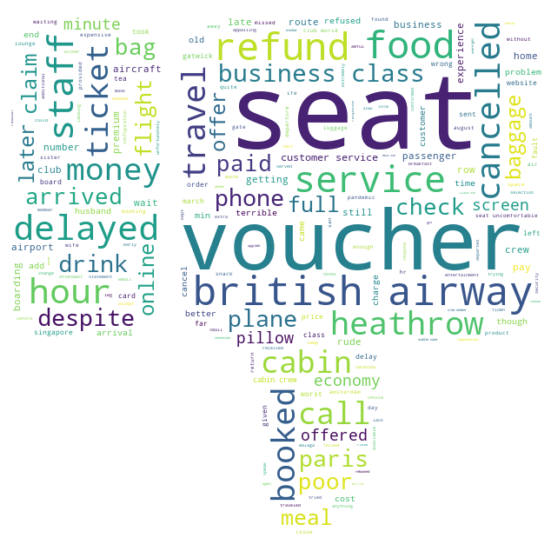

In [44]:
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
data_folder = Path("data")
mask_to_read = data_folder / "thumbdown.jpg"
# read the mask image
mask = np.array(Image.open(mask_to_read))

plt.figure(figsize=(16,10))
wordcloud = WordCloud(max_words=200, mask=mask, margin=10,background_color="white",
               random_state=1).generate(' '.join(CleanedReview))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[(('british', 'airway'), 24), (('business', 'class'), 13), (('customer', 'service'), 9), (('cabin', 'crew'), 7), (('seat', 'uncomfortable'), 6), (('refund', 'voucher'), 5), (('club', 'world'), 5), (('class', 'seat'), 4), (('club', 'class'), 4), (('middle', 'name'), 4), (('crew', 'member'), 4), (('obtain', 'refund'), 3), (('voucher', 'refund'), 3), (('travel', 'ban'), 3), (('waste', 'money'), 3), (('premium', 'economy'), 3), (('air', 'mile'), 3), (('buenos', 'aire'), 3), (('long', 'haul'), 3), (('check', 'staff'), 3), (('replacement', 'flight'), 3), (('seat', 'assignment'), 3), (('missed', 'connecting'), 3), (('los', 'angeles'), 2), (('inbound', 'aircraft'), 2), (('ahead', 'schedule'), 2), (('baggage', 'paid'), 2), (('social', 'distancing'), 2), (('amount', 'mask'), 2), (('online', 'voucher'), 2), (('email', 'confirmation'), 2), (('outbound', 'date'), 2), (('week', 'later'), 2), (('silver', 'card'), 2), (('phone', 'number'), 2), (('booked', 'flight'), 2), (('seat', 'selection'), 2), (('

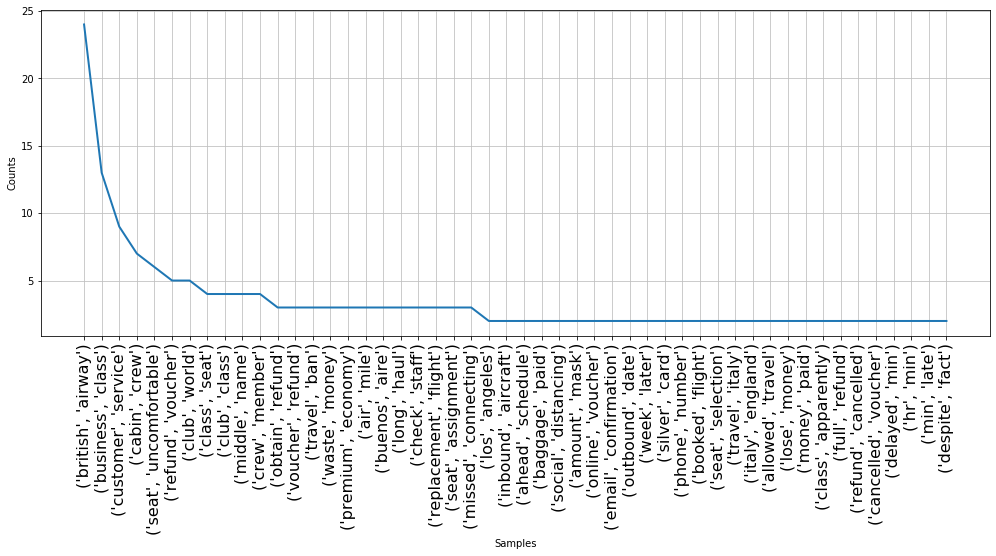

In [45]:
# What are 50 popular bigrams in positive reviews?
import nltk
from nltk import word_tokenize, FreqDist, bigrams

#Tokenize
tokens = word_tokenize(' '.join(CleanedReview))

#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)

#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
print(fdist_bi.most_common(50))

#Plot distribution
plt.figure(figsize=(17,6))
plt.xticks(rotation='vertical',fontsize=16)
fdist_bi.plot(50)

### Qatar British Airways Reviews

In [46]:
for sentence in qatardf['Review'][2:3]:
     print(sentence)

Flew from Doha Islamabad just the pandemic began March for week trip Pakistan The flight service was great you would expect Qatar Airways the March Qatar denied entry any resident permit holders and result became stranded went the Islamabad office who did not issue refund and they were not providing any explanation alternatives Time went and Qatar was not opening ways for anytime soon British National April took the repatriation flight Heathrow the aircraft was great very modern Service was excellent this day have been unable return Qatar Refunds should issued without hesitation causing problems for the customer least Over all the flights were great but the COVID pandemic has changed flying for all


In [47]:
# sentiment analysis using vaderSentiment with out removing the stop words (if not found: pip install vaderSentiment at command prompt)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()  

q_positive_review = []
q_negative_review = []
q_neutral_review = []

for sentence in qatardf['Review']:
    vs = analyzer.polarity_scores(sentence)
    if vs["compound"] >= 0.5:
        q_positive_review.append(sentence)
    elif vs["compound"] <= -0.5:
        q_negative_review.append(sentence)        
    else:
        q_neutral_review.append(sentence)
        
#How many movie reviews are bad / good according to vaderSentiment
print("Number of Positive Reviews:", len(q_positive_review))
print("Number of Negative Reviews:",len(q_negative_review))
print("Number of Neutral Reviews:",len(q_neutral_review))

Number of Positive Reviews: 155
Number of Negative Reviews: 11
Number of Neutral Reviews: 24


#### Positive Reviews

In [48]:
# What are the popular words in positive reviews after data cleanup ?
CleanedReview = list(data_wrangling(q_positive_review))

# most common words in title
from collections import Counter
reviewwords =list(CleanedReview)

print("Count of words in Title:" , len(reviewwords))
reviewwordcount = Counter(reviewwords)
reviewwordcount.most_common(15)


Count of words in Title: 7030


[('service', 146),
 ('airway', 128),
 ('seat', 102),
 ('staff', 95),
 ('food', 77),
 ('crew', 77),
 ('cabin', 76),
 ('class', 73),
 ('business', 58),
 ('check', 53),
 ('experience', 49),
 ('best', 47),
 ('flight', 44),
 ('excellent', 41),
 ('comfortable', 40)]

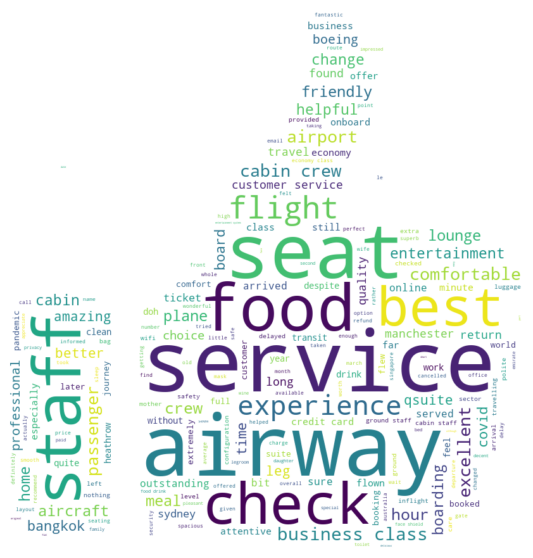

In [49]:
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
data_folder = Path("data")
mask_to_read = data_folder / "thumbup.jpg"
# read the mask image
mask = np.array(Image.open(mask_to_read))

plt.figure(figsize=(16,10))
wordcloud = WordCloud(max_words=200, mask=mask, margin=10,background_color="white",
               random_state=1).generate(' '.join(CleanedReview))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[(('business', 'class'), 44), (('cabin', 'crew'), 42), (('customer', 'service'), 17), (('credit', 'card'), 14), (('ground', 'staff'), 12), (('cabin', 'staff'), 11), (('economy', 'class'), 11), (('service', 'food'), 8), (('seat', 'comfortable'), 8), (('face', 'shield'), 7), (('excellent', 'service'), 7), (('food', 'drink'), 7), (('best', 'business'), 7), (('entertainment', 'system'), 7), (('check', 'staff'), 6), (('class', 'service'), 6), (('overall', 'experience'), 5), (('experience', 'airway'), 5), (('kuala', 'lumpur'), 5), (('meal', 'service'), 5), (('quality', 'service'), 5), (('polite', 'courteous'), 5), (('food', 'service'), 5), (('high', 'standard'), 5), (('boeing', 'seat'), 5), (('flown', 'business'), 4), (('food', 'delicious'), 4), (('service', 'excellent'), 4), (('lounge', 'access'), 4), (('leg', 'room'), 4), (('social', 'distancing'), 4), (('inflight', 'entertainment'), 4), (('airway', 'business'), 4), (('pay', 'extra'), 4), (('service', 'provided'), 4), (('highly', 'recommen

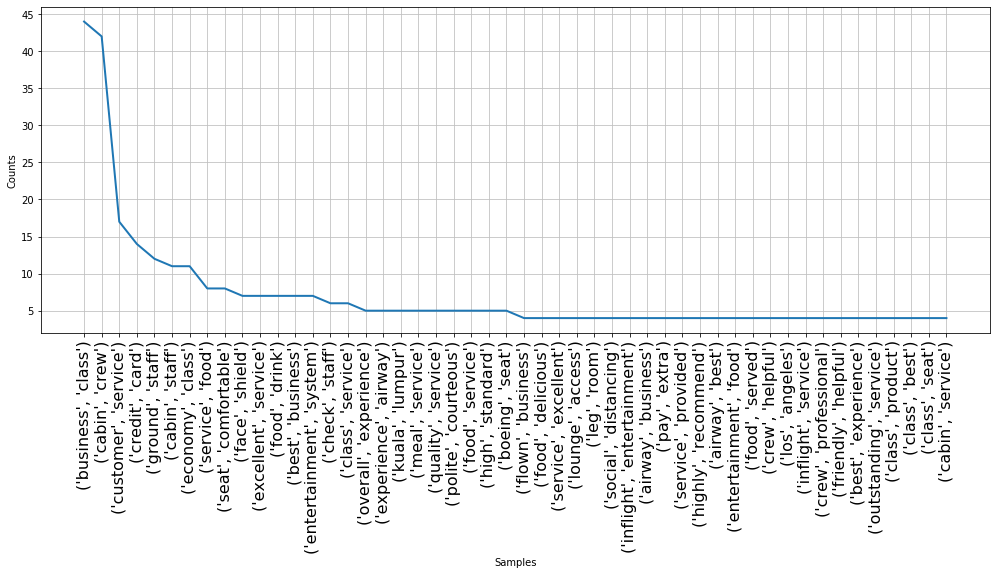

In [50]:
import nltk
from nltk import word_tokenize, FreqDist, bigrams

#Tokenize
tokens = word_tokenize(' '.join(CleanedReview))

#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)

#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
print(fdist_bi.most_common(50))

#Plot distribution
plt.figure(figsize=(17,6))
plt.xticks(rotation='vertical',fontsize=16)
fdist_bi.plot(50)

#### Negative Reviews

In [51]:
# What are the popular words in positive reviews after data cleanup ?
CleanedReview = list(data_wrangling(q_negative_review))

# most common words in title
from collections import Counter
reviewwords =list(CleanedReview)

print("Count of words in Title:" , len(reviewwords))
reviewwordcount = Counter(reviewwords)
reviewwordcount.most_common(15)


Count of words in Title: 644


[('service', 9),
 ('seat', 9),
 ('airway', 9),
 ('hour', 8),
 ('passenger', 8),
 ('offered', 7),
 ('airport', 7),
 ('delayed', 7),
 ('destination', 6),
 ('food', 6),
 ('customer', 6),
 ('phone', 6),
 ('informed', 6),
 ('left', 5),
 ('staff', 5)]

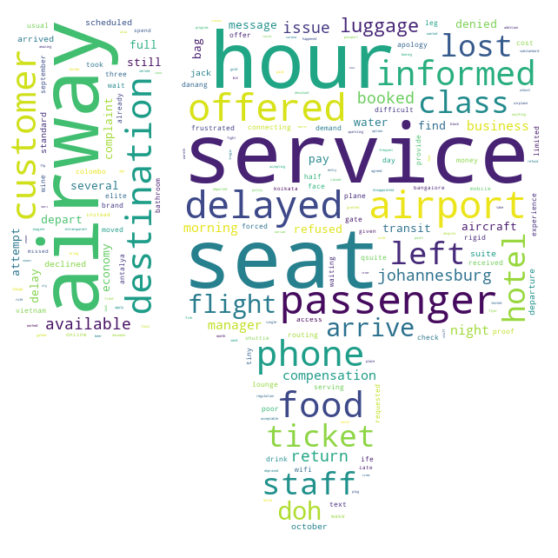

In [52]:
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
data_folder = Path("data")
mask_to_read = data_folder / "thumbdown.jpg"
# read the mask image
mask = np.array(Image.open(mask_to_read))

plt.figure(figsize=(16,10))
wordcloud = WordCloud(max_words=200, mask=mask, margin=10,background_color="white",
               random_state=1).generate(' '.join(CleanedReview))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[(('customer', 'service'), 4), (('business', 'class'), 3), (('food', 'water'), 2), (('service', 'phone'), 2), (('economy', 'class'), 2), (('airway', 'staff'), 2), (('text', 'message'), 2), (('hour', 'scheduled'), 2), (('night', 'hotel'), 2), (('arrive', 'destination'), 2), (('spend', 'night'), 2), (('half', 'delay'), 1), (('delay', 'water'), 1), (('water', 'offered'), 1), (('offered', 'delay'), 1), (('delay', 'transit'), 1), (('transit', 'point'), 1), (('point', 'plane'), 1), (('plane', 'left'), 1), (('left', 'several'), 1), (('several', 'hour'), 1), (('hour', 'destination'), 1), (('destination', 'apology'), 1), (('apology', 'offered'), 1), (('offered', 'staff'), 1), (('staff', 'find'), 1), (('find', 'pay'), 1), (('pay', 'connecting'), 1), (('connecting', 'though'), 1), (('though', 'paid'), 1), (('paid', 'full'), 1), (('full', 'ticket'), 1), (('ticket', 'destination'), 1), (('destination', 'demand'), 1), (('demand', 'agreed'), 1), (('agreed', 'sort'), 1), (('sort', 'final'), 1), (('fin

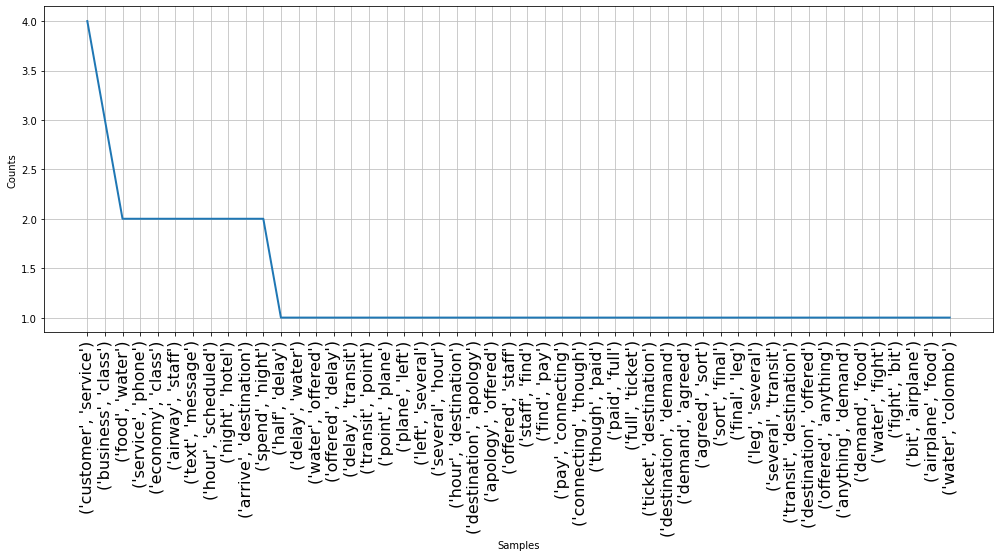

In [53]:
# What are 50 popular bigrams in positive reviews?
import nltk
from nltk import word_tokenize, FreqDist, bigrams

#Tokenize
tokens = word_tokenize(' '.join(CleanedReview))

#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)

#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
print(fdist_bi.most_common(50))

#Plot distribution
plt.figure(figsize=(17,6))
plt.xticks(rotation='vertical',fontsize=16)
fdist_bi.plot(50)

## Topic Modeling

A Topic model may be defined as the probabilistic model containing information about topics in our text. But here, two important questions arise which are as follows −

First, what exactly a topic is?

    Topic, as name implies, is underlying ideas or the themes represented in our text. To give you an example, the corpus containing newspaper articles would have the topics related to finance, weather, politics, sports, various states news and so on.

Second, what is the importance of topic models in text processing?

    As we know that, in order to identify similarity in text, we can do information retrieval and searching techniques by using words. But, with the help of topic models, now we can search and arrange our text files using topics rather than words.

In this sense we can say that topics are the probabilistic distribution of words. That’s why, by using topic models, we can describe our documents as the probabilistic distributions of topics.


Next we'll look at both airlines and find the topics that were common in the customer reviews.

In [54]:
#### text processing for Topic Modeling ######
def text_processing(reviews):
    
    # Remove useless numbers and alphanumerical words
    documents = [re.sub("[^a-z,A-Z]+", " ",str(text)) for text in reviews]

    # tokenize & lowercase
    texts = [[word for word in text.lower().split() ] for text in documents]

    # stemming words: having --> have; friends --> friend
    lmtzr = WordNetLemmatizer()
    texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]
    
    # remove common words
    more_stopwords = set(('flight','will', 'must','people', 'need', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way',
                   'president', 'want', 'like','say','got','said','just','something','tell','put','now', 'bad','back','want',
                   'right','every','one','use','come','never', 'many','along','things','day','also','first','guy', 'great', 
                   'take', 'good', 'much','anderson', 'let', 'would', 'year', 'thing', 'america', 'talk', 'talking', 'thank',
                   'does', 'give', 'look', 'believe', 'tonight','today','see','that', 'this', 'em', 'wa', 'http', 'com', 'que',
                   'one', 'want', 'would', 'also', 'unless','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
                   'book','ply','flying','what','yep','yer','aest','didn','nzdt','via','typed', 'impact','alongside','list',
                   'range', 'one','com','new','like','great','make','top', 'question', 'answer', 'tonight', 'american',
                   'tomorrow', 'good','wow','yes','say','yay','would','thanks','thank','going', 'learned', 'another','apart',
                   'iyi', 'yle', 'new','use','should','could','really','see','want','nice', 'able', 'airline', 'made', 
                   'called','two', 'while','know','free','today','day','always','last','put','live', 'trip', 'due', 'ask',
                   'asked', 'help', 'week','went','wasn','was','used','ugh','try','kind', 'http','much', 'airline', 'fly',
                   'need', 'next','app','ibm','appleevent','using','talk','film', 'totally','seen', 'told','yet','stll', 
                   'non', 'hour', 'time', 'take', 'movie', 'even', 'give','reminded', 'year', 'pre', 'saw', 'created',
                   'create', 'come', 'real', 'etc', 'cinema', 'everything', 'fit', 'buy', 'tell', 'including', 'finally',
                   'guess', 'also', 'lot', 'plenty', 'someone','onto', 'every', 'everywhere', 'thought', 'watched', 'look',
                   'caught', 'love', 'loved', 'gave', 'per', 'actor', 'anyone', 'else', 'think', 'airlines','review','focus',
                   'act', 'dose','ever','thing','never', 'show','maintains','watch','added','justiced', 'action','doha','london', 
                   'airway', 'qatar', 'perth', 'melbourne', 'london'))

    stoplist = set(stopwords.words('english')) | more_stopwords
    texts = [[word for word in text if word not in stoplist] for text in texts]

    # remove short words
    texts =[[word for word in tokens if len(word) >3] for tokens in texts]
    print(texts[:2])
    return texts

### British Airways

In [55]:
#Create Corpus for Topic modeling
reviews = []
for row in britishdf['Review']:
    reviews.append([row])   
reviews[:2]

[['Overall have say really pleased with the service provided given the circumstances which must particularly challenging for airlines had call few times regarding both outbound and return flight and would rate their customer service Everyone talked was extremely friendly and helpful one employee even tried help figure out the recently updated arrival regulations from Italian website and listened rant about constantly changing restrictions and quarantines was refunded promptly for part flight that had been cancelled and was able change return flight completely different route and date with only minimal charge They have really shown flexibility here which needed when travelling The flight itself was fine and appreciate that food and drink options are currently bit limited given that everyone should wear their mask much possible rather than sipping tea The one thing which mean constructive criticism though think could improve little more exchange with their destination airports The arriva

In [56]:
cleantext = text_processing(reviews)

[['overall', 'pleased', 'service', 'provided', 'given', 'circumstance', 'particularly', 'challenging', 'call', 'regarding', 'outbound', 'return', 'rate', 'customer', 'service', 'everyone', 'talked', 'extremely', 'friendly', 'helpful', 'employee', 'tried', 'figure', 'recently', 'updated', 'arrival', 'regulation', 'italian', 'website', 'listened', 'rant', 'constantly', 'changing', 'restriction', 'quarantine', 'refunded', 'promptly', 'part', 'cancelled', 'change', 'return', 'completely', 'different', 'route', 'date', 'minimal', 'charge', 'shown', 'flexibility', 'needed', 'travelling', 'fine', 'appreciate', 'food', 'drink', 'option', 'currently', 'limited', 'given', 'everyone', 'wear', 'mask', 'possible', 'rather', 'sipping', 'mean', 'constructive', 'criticism', 'though', 'improve', 'little', 'exchange', 'destination', 'airport', 'arrival', 'sheet', 'italy', 'given', 'outdated', 'ground', 'staff', 'heathrow', 'charge', 'boarding', 'procedure', 'swab', 'test', 'mandatory', 'arrival', 'italy

In [62]:
# Perform text processing required for topic modeling with Gensim to build dictionary
from gensim.corpora import Dictionary

#create a dictionary representation of the documents.
dictionary = Dictionary(cleantext)

# Filter out words in the dictionary by their frequency (that occur less than 2 documents, or more than 40% or 50% of the documents).
dictionary.filter_extremes(no_below=2, no_above=0.4, keep_n=None)
#If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.
print(dictionary[10])

#Convert document into the bag-of-words (BoW) format - returns list of (int, int) – BoW representation of document
corpus = [dictionary.doc2bow(text) for text in cleantext]
print(corpus[:2])

# Number of tokens and reviews in British Airlines data
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

circumstance
[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 3), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)], [(25, 1), (29, 2), (51, 1), (60, 1), (77, 1), (78, 2), (79, 3), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 2), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1)]]
Number of unique tokens: 1104
Number of documents: 190


Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

For example, (0, 1) above implies, word id 0 occurs once in the first document. Likewise, (1, 1) word id 1 occurs once and so on. This is used as the input by the LDA model.

### Determine Number of Topics (i.e. Optimal k value )
Vowpal Wabbit (also known as "VW") is an open-source fast out-of-core machine learning system library and program developed originally at Yahoo! Research, and currently at Microsoft Research. It was started and is led by John Langford. Vowpal Wabbit is notable as an efficient scalable implementation of online machine learning with support for a number of machine learning reductions, importance weighting, and a selection of different loss functions and optimization algorithms.

LDAMALLET is based on a Java-based package for statistical natural language processing, document classification, clustering, topic modeling, information extraction, and other machine learning applications to text. It is available in Python.

Coherence Model calculates topic coherence for topic models. This is the implementation of the four stage topic coherence pipeline from the paper Michael Roeder, Andreas Both and Alexander Hinneburg: “Exploring the space of topic coherence measures”. Typically, CoherenceModel used for evaluation of topic models.

The four stage pipeline is basically:  

        Segmentation
        Probability Estimation
        Confirmation Measure
        Aggregation
        
Implementation of this pipeline allows for the user to in essence “make” a coherence measure of his/her choice by choosing a method in each of the pipelines.

In [69]:
#Get Models for LDA
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet
from gensim.models import ldamodel

np.random.seed(1) # setting random seed to get the same results each time for different topic sizes. 
for k in range(2, 20):
    goodLdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus,dictionary=dictionary, coherence='u_mass')
    print('k-value:',k,' coherence:',goodcm.get_coherence())

k-value: 2  coherence: -2.6692639240054525
k-value: 3  coherence: -1.9696813670515267
k-value: 4  coherence: -2.0893566307164386
k-value: 5  coherence: -3.6120064068667523
k-value: 6  coherence: -3.279106906870871
k-value: 7  coherence: -3.8760605991232846
k-value: 8  coherence: -3.3250609795342685
k-value: 9  coherence: -4.441430822724234
k-value: 10  coherence: -4.292656518515315
k-value: 11  coherence: -3.971096050509601
k-value: 12  coherence: -4.28324989045253
k-value: 13  coherence: -4.50407536865012
k-value: 14  coherence: -4.49811221833697
k-value: 15  coherence: -4.417848080480794
k-value: 16  coherence: -5.600473972388674
k-value: 17  coherence: -4.580289304334859
k-value: 18  coherence: -4.992999982297447
k-value: 19  coherence: -5.121833703188867


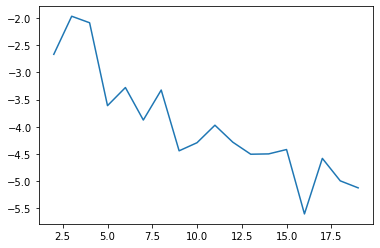

In [70]:
#Plot Output
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)  # setting random seed to get the same results each time.
k_range = range(2, 20)
scores = []
for k in k_range:
    goodLdaModel = ldamodel.LdaModel(
        corpus=corpus, id2word=dictionary, num_topics=k, passes=50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus,
                            dictionary=dictionary, coherence='u_mass')
    scores.append(goodcm.get_coherence())

plt.figure()
plt.plot(k_range, scores)

##### LDA Model Building

In [71]:
# view corpus again 
for i in corpus[100:102]:   #bag-of-words (BoW)  in list of (token_id, token_count) format
    print(i)

[(28, 2), (29, 1), (59, 1), (66, 1), (112, 1), (123, 1), (296, 1), (363, 1), (463, 1), (527, 1), (543, 1), (661, 1), (768, 1), (772, 1), (782, 2), (854, 1), (1008, 1)]
[(146, 1), (151, 1), (276, 1), (341, 1), (497, 1), (549, 1), (671, 1), (757, 1), (806, 1), (844, 1), (861, 1), (888, 1), (915, 1), (936, 1), (983, 1), (1009, 1), (1010, 1)]


In [72]:
# view dictionary again - Dictionary encapsulates the mapping between normalized words and their integer ids/token_id.
dictionary.id2token[100]

'hungry'

In [73]:
#build a LDA topic model with 20 topics
np.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, passes=20)

In [74]:
model.show_topics()

[(2,
  '0.022*"cabin" + 0.021*"aircraft" + 0.016*"crew" + 0.015*"staff" + 0.013*"friendly" + 0.013*"find" + 0.013*"left" + 0.011*"delayed" + 0.011*"passenger" + 0.010*"boarding"'),
 (0,
  '0.019*"world" + 0.017*"food" + 0.017*"check" + 0.014*"crew" + 0.014*"club" + 0.012*"british" + 0.011*"however" + 0.011*"long" + 0.009*"full" + 0.008*"cabin"'),
 (19,
  '0.025*"class" + 0.025*"business" + 0.019*"heathrow" + 0.016*"food" + 0.016*"cabin" + 0.015*"economy" + 0.015*"singapore" + 0.013*"crew" + 0.013*"comfortable" + 0.013*"voucher"'),
 (9,
  '0.020*"business" + 0.018*"meal" + 0.017*"class" + 0.015*"lounge" + 0.014*"club" + 0.013*"boarding" + 0.013*"town" + 0.013*"cape" + 0.013*"staff" + 0.012*"customer"'),
 (7,
  '0.037*"pillow" + 0.036*"class" + 0.024*"business" + 0.022*"voucher" + 0.019*"husband" + 0.015*"staff" + 0.011*"call" + 0.011*"national" + 0.011*"redeem" + 0.011*"cancelled"'),
 (8,
  '0.020*"lounge" + 0.016*"food" + 0.013*"check" + 0.013*"luggage" + 0.011*"crew" + 0.008*"british"

In [76]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.029649 -0.042878       1        1   7.511948
1     -0.051945 -0.035027       2        1   4.435591
2      0.063292  0.113455       3        1   4.461468
3      0.117000  0.004837       4        1   6.704578
4     -0.163932  0.065794       5        1   2.307974
5     -0.033811 -0.046636       6        1   1.927407
6     -0.119819  0.049137       7        1   4.401810
7     -0.034487 -0.045964       8        1   3.075297
8      0.034067 -0.016155       9        1   4.765341
9      0.075817 -0.096104      10        1   5.760883
10     0.043942  0.062305      11        1   3.437990
11    -0.084658 -0.043865      12        1   6.232675
12    -0.049378  0.142960      13        1   6.527957
13    -0.006389  0.009292      14        1   4.223143
14    -0.044287  0.026364      15        1   1.029151
15     0.105596 -0.037561      16        1   5.564995
16     0.062501  0.103877      17        1   6.109755
17     0.109306 -0.052554      18        1  11.680560
18    -0.133889 -0.145081      19        1   3.312944
19     0.081426 -0.016196      20        1   6.528531, topic_info=          Term       Freq      Total Category  logprob  loglift
316     travel  29.000000  29.000000  Default  30.0000  30.0000
66       staff  55.000000  55.000000  Default  29.0000  29.0000
279    voucher  35.000000  35.000000  Default  28.0000  28.0000
119      class  63.000000  63.000000  Default  27.0000  27.0000
79     british  69.000000  69.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
66       staff   2.712285  55.504342  Topic20  -5.1439  -0.2897
103  passenger   2.712154  35.839540  Topic20  -5.1439   0.1477
14    customer   2.712058  43.578802  Topic20  -5.1440  -0.0479
79     british   2.712002  69.894473  Topic20  -5.1440  -0.5203
5    cancelled   2.711849  27.877069  Topic20  -5.1440   0.3988

[1237 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
105       4  0.569049  absolutely
105      17  0.284525  absolutely
885       1  0.391548  acceptable
885      11  0.391548  acceptable
321       2  0.144447      access
...     ...       ...         ...
545       3  0.260687        zero
545       4  0.130344        zero
545      19  0.260687        zero
714       1  0.288897        zone
714       9  0.577795        zone

[2926 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

### Qatar Airways

In [77]:
#Create Corpus for Topic modeling
reviews = []
for row in qatardf['Review']:
    reviews.append([row])   
reviews[:2]

[['flew Sydney Doha London business class not flown business before thought would treat ourselves our bookings were made well advance pre Covid Due the restrictions flying our flight got pushed back until finally got clearance fly one year after our initial booking and six months after our intended flight Changing our tickets was simplicity and the person dealing with the change was very helpful Checking Sydney was average with the check staff doubling with gate duties there were only four flights departing Sydney that evening they weren exactly rushed off their feet The flight was uneventful which how you want The service was exemplary very attentive and the food was delicious with plenty The seat although lie flat wasn comfortable was expecting and the hour flight got somewhere between hours sleep The flight entertainment was average with few major movies available had three hours Doha before catching our onward flight Heathrow and used most the three hours the spacious lounge refres

In [78]:
cleantext = text_processing(reviews)

[['flew', 'sydney', 'business', 'class', 'flown', 'business', 'treat', 'booking', 'advance', 'covid', 'restriction', 'pushed', 'clearance', 'initial', 'booking', 'month', 'intended', 'changing', 'ticket', 'simplicity', 'person', 'dealing', 'change', 'helpful', 'checking', 'sydney', 'average', 'check', 'staff', 'doubling', 'gate', 'duty', 'four', 'departing', 'sydney', 'evening', 'exactly', 'rushed', 'foot', 'uneventful', 'service', 'exemplary', 'attentive', 'food', 'delicious', 'seat', 'although', 'flat', 'comfortable', 'expecting', 'somewhere', 'sleep', 'entertainment', 'average', 'major', 'available', 'three', 'catching', 'onward', 'heathrow', 'three', 'spacious', 'lounge', 'refreshing', 'onward', 'repeat', 'generally', 'pleasant', 'caveat', 'overall', 'onboard', 'experience', 'marred', 'isolation', 'destination', 'find', 'expensive', 'electrical', 'item', 'badly', 'damaged', 'despite', 'marked', 'fragile', 'response', 'effectively', 'tough', 'term', 'service', 'signed', 'declined', 

In [80]:
# Perform text processing required for topic modeling with Gensim to build dictionary
from gensim.corpora import Dictionary

#create a dictionary representation of the documents.
dictionary = Dictionary(cleantext)

# Filter out words in the dictionary by their frequency (that occur less than 2 documents, or more than 40% or 50% of the documents).
dictionary.filter_extremes(no_below=2, no_above=0.4, keep_n=None)
#If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.
print(dictionary[10])

#Convert document into the bag-of-words (BoW) format - returns list of (int, int) – BoW representation of document
corpus = [dictionary.doc2bow(text) for text in cleantext]
print(corpus[:2])

# Number of tokens and reviews in British Airlines data
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

checking
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 3), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1)], [(7, 1), (42, 1), (59, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1)]]
Number of unique tokens: 979
Number of documents: 190


##### LDA Model Building

In [83]:
#build a LDA topic model with 20 topics
np.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, passes=20)

In [91]:
model.show_topics()

[(0,
  '0.029*"seat" + 0.024*"staff" + 0.024*"crew" + 0.022*"comfortable" + 0.021*"food" + 0.019*"cabin" + 0.018*"polite" + 0.018*"extremely" + 0.014*"best" + 0.013*"passenger"'),
 (16,
  '0.038*"seat" + 0.022*"business" + 0.022*"class" + 0.022*"check" + 0.019*"boeing" + 0.013*"bangkok" + 0.011*"flew" + 0.010*"layout" + 0.010*"lounge" + 0.010*"aircraft"'),
 (19,
  '0.036*"business" + 0.029*"class" + 0.026*"lounge" + 0.023*"seat" + 0.015*"customer" + 0.013*"experience" + 0.012*"crew" + 0.012*"sydney" + 0.012*"access" + 0.012*"upgrade"'),
 (10,
  '0.024*"class" + 0.021*"business" + 0.019*"seat" + 0.017*"passenger" + 0.015*"crew" + 0.013*"sydney" + 0.011*"perfect" + 0.011*"comfortable" + 0.011*"aircraft" + 0.011*"economy"'),
 (17,
  '0.058*"seat" + 0.039*"check" + 0.022*"ticket" + 0.022*"mother" + 0.020*"cabin" + 0.020*"crew" + 0.017*"customer" + 0.013*"name" + 0.013*"helped" + 0.013*"booked"'),
 (14,
  '0.027*"airport" + 0.020*"check" + 0.015*"card" + 0.015*"credit" + 0.014*"staff" + 0.0

In [84]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.087465 -0.102556       1        1   5.366340
1     -0.129996  0.024593       2        1   3.358521
2      0.026055 -0.032290       3        1   4.271211
3      0.010300 -0.152455       4        1   6.902360
4      0.035586  0.132478       5        1   3.153406
5      0.015418 -0.088717       6        1   8.527867
6      0.095402  0.031944       7        1   6.192916
7     -0.062002  0.012367       8        1   1.218651
8      0.048363 -0.000869       9        1   2.711358
9      0.089965 -0.091102      10        1   8.223606
10     0.105749  0.076688      11        1   6.504138
11    -0.074373 -0.035182      12        1   3.883008
12    -0.119305  0.097578      13        1   1.454874
13    -0.046359 -0.008889      14        1   3.393559
14    -0.072114 -0.023966      15        1  13.415014
15     0.101875  0.081746      16        1   3.768094
16     0.059800 -0.009611      17        1   5.651022
17    -0.100014 -0.041392      18        1   2.994549
18    -0.105881  0.002464      19        1   4.511494
19     0.034066  0.127172      20        1   4.498011, topic_info=              Term        Freq       Total Category  logprob  loglift
51            seat  108.000000  108.000000  Default  30.0000  30.0000
9            check   61.000000   61.000000  Default  29.0000  29.0000
6         business   58.000000   58.000000  Default  28.0000  28.0000
239        airport   49.000000   49.000000  Default  27.0000  27.0000
66        customer   35.000000   35.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
23   entertainment    2.051219   31.496355  Topic20  -4.9248   0.3701
116          cabin    2.063235   69.640343  Topic20  -4.9190  -0.4175
364   professional    1.749294   17.419725  Topic20  -5.0841   0.8031
227    outstanding    1.749290   14.791225  Topic20  -5.0841   0.9667
448        comfort    1.749209   11.316519  Topic20  -5.0841   1.2344

[1174 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
492       1  0.389246      abroad
492      19  0.389246      abroad
790       6  0.395178  acceptable
790       9  0.395178  acceptable
153       6  0.329908      access
...     ...       ...         ...
713      13  0.254464        york
503       4  0.382787       young
503      17  0.382787       young
714       2  0.392706        zone
714       4  0.392706        zone

[2547 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

## Network Analytics

_Twitter Search Network importer from NodeXL has been used to collect up to 2000 recent tweets from the past 9 days on search  keywords britishairways and Qatarairways. **This data has been imported to Gephi to find the most influential mentions (with highest Betweenness cetrality) in the network**_.

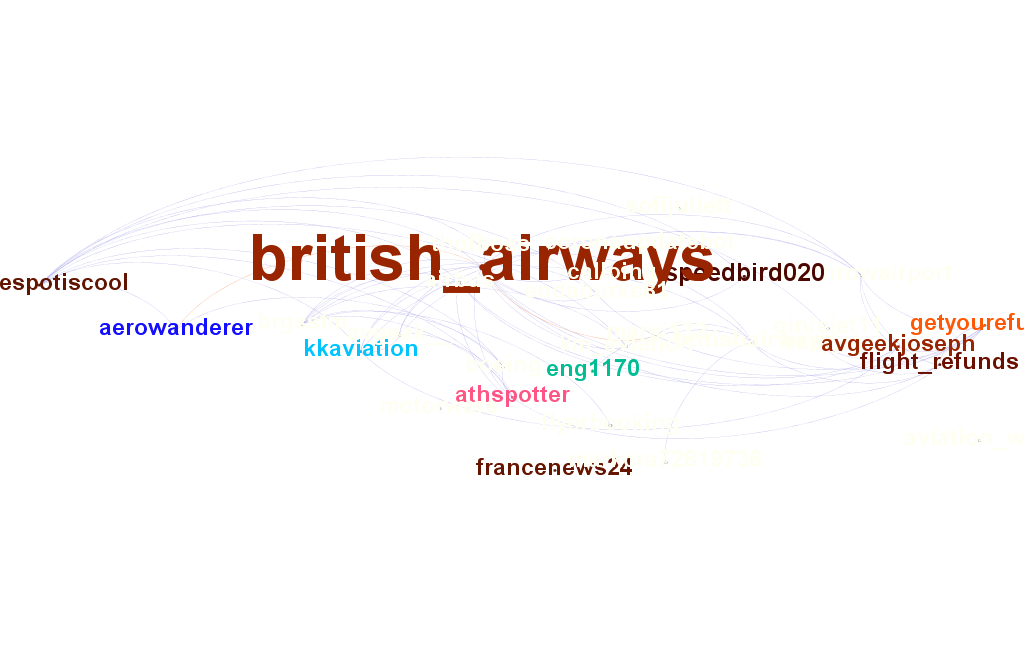

In [85]:
# Popular mentions interms of measure of centrality in a graph based on shortest paths.
from IPython.display import Image
Image("British_final.png")

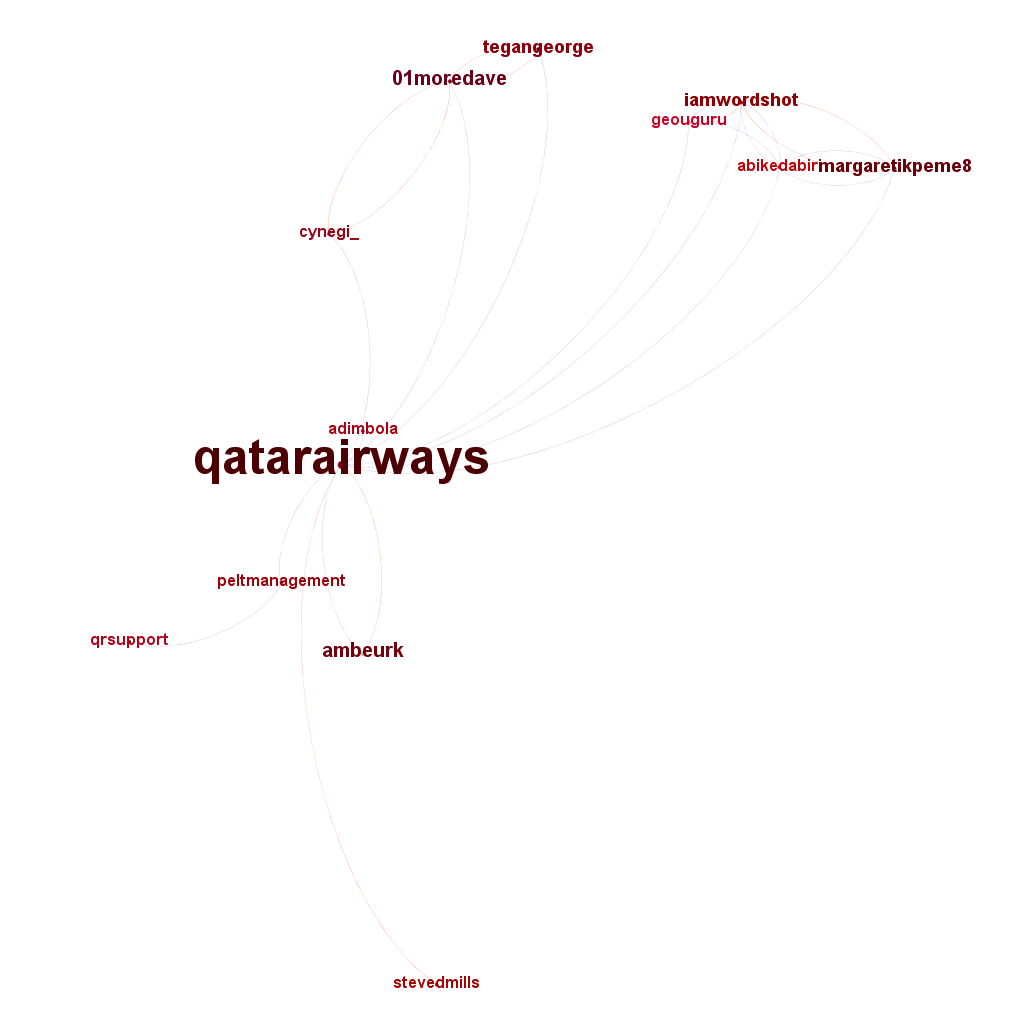

In [86]:
# Popular mentions interms of measure of centrality in a graph based on shortest paths.
from IPython.display import Image
Image("Qatar_final.png")

# Interpreting our data

**British Airways :**

Popular bigrams from Postive Reviews are  ('business', 'class'), ('cabin', 'crew'), ('customer', 'service'), ('club', 'world'), ('food', 'drink'), ('boarding', 'pass'), ('club', 'europe'), ('seat', 'comfortable'), ('economy', 'class'), ('service', 'friendly') 

    * This shows that British Airways provides comfortable seats, economy class, customer service , food, drink and friendly staff.

Popular words/bigrams from Negative Reviews are 'seat','service', 'voucher','refund', 'food', ('business', 'class),  'staff', 'delayed',  ('customer', 'service'), ('cabin', 'crew'), ('seat', 'uncomfortable'), ('refund', 'voucher'), ('voucher', 'refund'), ('travel', 'ban'), ('waste', 'money'), ('premium', 'economy'), (('long', 'haul'),('replacement', 'flight'), ('seat', 'assignment'), ('missed', 'connecting'), ('social', 'distancing'), ('amount', 'mask'), ('online', 'voucher'), ('full', 'refund'), ('refund', 'cancelled'), ('cancelled', 'voucher') 

    * This shows that British airways has got high complaints in areas of travel ban, social distancing , seat assignments, long haul, connecting, refund and vocher issues which are likely specific to pandemic situations and needs to find ways to fix them.

**Qatar Airways :**

Popular bigrams from Postive Reviews are ('business', 'class'),('cabin', 'crew'), ('customer', 'service'), ('credit', 'card'), ('ground', 'staff'), ('economy', 'class'), ('service', 'food'), ('seat', 'comfortable'), ('face', 'shield'), ('excellent', 'service'), ('food', 'drink'), ('best', 'business'),  ('entertainment', 'system'),('overall', 'experience'),('meal', 'service'),('polite', 'courteous'), ('food', 'delicious'), ('service', 'excellent')('lounge', 'access'),('leg', 'room'), ('social', 'distancing'), ('highly', 'recommend') 

        * This shows that Qatar airways is doing its best in dealing with situaltions by providing comfortable seats with leg room, face shields, maintaining social distancing, friendly/courteous staff. Their business and economy class are highly recommened by customers and great overall experience.

Popular words/bigrams from Negative Reviews are 'service','seat', 'hour','passenger','airport', 'delayed', 'food', 'phone','left', 'staff', ('hour', 'scheduled'), ('night', 'hotel'), ('arrive', 'destination'), ('spend', 'night'), ('half', 'delay'), ('offered', 'delay'), ('delay', 'transit'), 1), ('transit', 'point'), ('plane', 'left'), ('left', 'several'), ('several', 'hour'), ('hour', 'destination'), ('apology', 'offered') 
    
       * This shows that Qatar is lacking in terms of flight delays and arraival in destinations and transits seems to be the prority area to focus on.
    

**Stand in the market:**

British airlines was recommended by only 40% by their customers and their Economy Class has got highest 'No' recommended than 'Yes'.  
_where as_      
Qatar airways was recommended by nearly 76% by their customers and their  Economy and Business Class has got highest 'Yes' recommended than 'No'
    
       * This is an evident that Qatar stands in better position in terms of Economy class service.


Descriptive Analytics(Heat map) shows that British airlines Recommendation has lowest correlations with 'wifi' and 'Entertainment', and highly correlated with 'Food and Beverages', 'Cabin Service', 'Seat Comfort' along with 'Value for Money' and 'Overall Rating'.  
_where as_   
Qatar airlines Recommendation has lowest correlations with 'wifi' and 'Entertainment', and highly correlated with  'Seat Comfort', 'Ground Serive', 'Food and Beverages' along with 'Value for Money' and 'Overall Rating'.  
    
    * This is a proof that both airlines are not much judged by their entertainment service rather by their Seat Comfort, Groud Service, Foos and Beverages.
    

For British Airlines,  data shows that customers who gave high Overall Rating (above 8) yet gave mixed ("Yes" or "No") recommendation. This is evidence that there is a lot of variability when dealing with customer satisfaction.  
_where as_    
For Qatar Airlines, data shows that customers who gave high Overall Rating (above 8) gave "Yes" recommendation.  


**Topic Modeling shows that both airlines have the following trends in their customer reviews. We can observe the similarities/difference in topics.**

British 

cabin + aircraft + crew + staff + friendly + find + left + delayed + passenger + boarding ->  **Friendly Cabin Crew**  
world + food + check + crew + club + british + however + long + full + cabin ->  **Pandemic Delays**  
class + business + heathrow + food + cabin + economy + singapore + crew + comfortable + voucher ->  **Comfortable Business Class**  
business + meal + class + lounge + club + boarding + town + cape + staff + customer ->  **Boarding Staff**   
pillow + class + business + voucher + husband + staff + call + national + redeem + cancelled ->  **Voucher Redeem Cancellation**  
lounge + food + check + luggage + crew + british + onboard + drink + best + access ->  **Checkin experience**  
british + paris + crew + boarding + cancel + pandemic + arrived + travel + late + heathrow ->  **Pandemic late arrivals and cancellations**  
food + boarding + passenger + cabin + boeing + full + lack + experience + staff + booking ->  **Booking experience**  
travel + british + world + policy + check + credit + refundable + rebook + ticket + ensure ->  **Refund Policy**  
british + gatwick + friendly + staff + configuration + uncomfortable + food + aisle + crew + helpful ->  **Food and Beverages**  
    
  
Qatar

seat + staff + crew + comfortable + food + cabin + polite + extremely + best + passenger ->  **Polite Cabin Crew**  
seat + business + class + check + boeing + bangkok + flew + layout + lounge + aircraft ->  **Comfortable Business Class**   
business + class + lounge + seat + customer + experience + crew + sydney + access + upgrade ->   **Comfortable Business Class**  
class + business + seat + passenger + crew + sydney + perfect + comfortable + aircraft + economy ->   **Comfortable Business Class**    
seat + check + ticket + mother + cabin + crew + customer + name + helped + booked ->   **Checkin experience**  
airport + check + card + credit + staff + cabin + class + plane + crew + email ->  **Credit Card**    
kathmandu + especially + corona + pleasure + world + best + long + crew + generally + actually ->  **Pandemic Effect**    
staff + check + seat + entertainment + food + bangkok + better + cabin + wifi + plane ->  **Entertinment**    
staff + food + delayed + crew + best + excellent + friendly + helpful + cabin + seat ->  **Food**    
seat + return + food + comfortable + route + safe + centre + forward + excellent + journey ->  **Saftey**    



### References:
    
https://cguibourg.wordpress.com/2015/05/04/tutorial-network-analysis-of-a-twitter-hashtag-using-gephi-and-nodexl/  
https://www.airlinequality.com/review-pages/a-z-airline-reviews/  
